<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Modeling Case Study</h2>
<h4>DAT-5329 | Introduction to Machine Learning & AI </h4>
Predicting Low Birthweight<br>
Michelle Kae Celine Jo-anne Bantugon<br>
Hult International Business School<br>
April 05, 2024 <br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3> Introduction </h3>

The World Health Organization (WHO) defines low birth weight (LBW) as a birth weight of less than 2500 g. LBW is a major global public health concern. 19.8 million babies, or 14.7 percent of all births worldwide in 2020, were afflicted by LBW. This statistic is essential for evaluating the health of newborns and understanding the difficulties pregnant women experience (Alam, M. et.al, 2024). Prenatal care is considered by many to be an essential part of a pregnant mother's healthcare. The 2002 North Dakota PRAMS survey found that mothers who were <u>younger, less educated, single, American Indian, or Medicaid people</u> were more likely to report having difficulty accessing prenatal care as early as they would have liked. Therefore, by direct clinical screening and healthcare intervention, it is essential to precisely identify which pregnant patients may be most at-risk of delivering a baby with LBW during the preconception or early stages of pregnancy in order to save newborn lives and save potentially avoidable medical expenses.

Predicting low birth weight (LBW) will serve as a valuable tool for prevention and as an indicator of potential health risks for newborns. This analysis utilized different machine learning models and techniques to analyzed feature importance (risk factors) to make predictions regarding LBW.

<h3> Conclusion and Actionable Insights </h3>

The results of the analysis reveal that low birthweight may be caused by a number of factors. The model found that the month <b>prenatal care began, mother's age, mother's race (white), and prenatal visits</b> were the most significant factors. It indicates that the <b>highest risk factor for low birth weight</b> is the combined features of <b>mother's age and the starting month of their prenatal care</b>. This is followed by the <b>inadequate prenatal visits (fewer than 8)</b>. The model also showed that the <b>combined features of women older than 34 of white race</b> were associated with low birth weight. Other factors such as the <b>combined features of starting month of prenatal care and different races as well as educational level </b>were among the other features that can help predict low birthweight.

These findings were all consistent to the study in North Dakota last 2002 in which mothers had an average of 11 prenatal care visits and only 20 percent of mothers also did not receive prenatal care in their first trimester. Moreover research last 2016 about the Timing and Adequacy of Prenatal Care in the United States in which it was found out that Prenatal Care (PNC) utilization in the United States, based on the trimester of pregnancy in which PNC began and the Adequacy of Prenatal Care Utilization (APNCU) Index, by maternal age, race and Hispanic origin, education, state of residence, birth order, and source of payment for the delivery. Similarly, state data center records showed that race, mother's age, and educational attainment all contributed to the quantity of mothers in North Dakota who did not start prenatal care in the first trimester. 

Pregnant women should therefore start having prenatal checks in the first trimester (the first four months of pregnancy) and made at least eight to ten visits of the recommended checkup prior to delivery. Likewise, it is also crucial to have a regular, promptly, and adequate appointments in order to improve delivery outcomes and prevent low birth weight. Advanced maternal age was another crucial component, specifically for white mothers, since it is considered that an older mother during birth poses a considerable risk for the health of the delivery. Healthcare systems can strengthen measures to support frequent and early prenatal visits in order to better safeguard against potential risks related to low birth weight. Moreover, for expecting mothers who might not be aware of these risk factors, it might direct the development of targeted LBW early prevention, clinical intervention, and statewide changes to maternity and infant health policies. Implementing these actionable strategies and having a system for services and access can effectively prevent and address low birth weight issues, thereby improving both maternal and infant health outcomes.

<h3>Part I - Preparation and Exploration</h3>
<h4>a) Package and Dataset Imports</h4>

In [1]:
# Importing libraries
import numpy  as np                                          # mathematical essentials
import pandas as pd                                          # data science essentials
import matplotlib.pyplot as plt                              # essential graphical output
import sklearn.linear_model                                  # linear models
from sklearn.model_selection import train_test_split         # train/test split
from sklearn.preprocessing import StandardScaler             # standard scaler
from sklearn.tree import plot_tree                           # tree plots
from sklearn.model_selection import RandomizedSearchCV       # hyperparameter tuning
import phik                                                  # Matthew's coefficient (phi)

# preprocessing and testing
from sklearn.preprocessing import PowerTransformer          # fixing skewness
from sklearn.preprocessing import StandardScaler            # standard scaler
from sklearn.model_selection import train_test_split        # train-test split


# machine learning
import statsmodels.formula.api as smf
from sklearn.linear_model import RidgeClassifier            # Ridge Classification
from sklearn.linear_model import LogisticRegression         # logistic regression
from sklearn.tree import DecisionTreeClassifier             # decision tree
from sklearn.ensemble import RandomForestClassifier         # random forest
from sklearn.ensemble import GradientBoostingClassifier     # gbm

# model results
from sklearn.metrics import make_scorer                     # customizable scorer
from sklearn.metrics import precision_recall_curve, accuracy_score 
from sklearn.metrics import f1_score as calculate_f1_score  # f-1 score
from sklearn.metrics import (confusion_matrix, f1_score,
                             roc_auc_score, precision_score, 
                             recall_score, roc_curve)


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## importing data ##

# reading modeling data into Python
modeling_data = './birthweight.xlsx'

# calling this df_train
birth = pd.read_excel(io         = modeling_data,
                         sheet_name = 'birthweight',
                         header     = 0,
                         index_col  = 'bwt_id')

# checking the first five rows of data
birth.head(n = 5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
bwt_id,,,,,,,,,,,,,,,,,,
bwt_1,28,12.0,2,10.0,31.0,17.0,8.0,9.0,0.0,0.0,0,1,0,0,1,0,0,3317
bwt_2,21,NaN,1,6.0,21.0,NaN,8.0,9.0,NaN,NaN,0,1,0,0,1,0,0,1160
bwt_3,27,15.0,2,11.0,32.0,16.0,9.0,9.0,0.0,0.0,1,1,0,0,1,0,0,4706
bwt_4,33,17.0,1,20.0,39.0,17.0,9.0,10.0,0.0,0.0,0,0,0,1,0,0,1,3289
bwt_5,30,15.0,2,12.0,36.0,16.0,9.0,9.0,NaN,NaN,1,1,0,0,1,0,0,3490


In [2]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export=False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # number of features to plot
    n_features = train.shape[1]
    
    # Sort feature importances
    feature_importances = pd.Series(model.feature_importances_, index=train.columns)
    sorted_feature_importances = feature_importances.sort_values(ascending=True)
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12, 9))
    
    # Remove gridlines
    ax.grid(False)
    
    plt.barh(range(n_features), sorted_feature_importances, align='center')
    plt.yticks(np.arange(n_features), sorted_feature_importances.index)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export:
        plt.savefig('./analysis_images/Feature_Importance.png')

In [3]:
# instantiating data dictionary for the dataset
dictionary = './birthweight_data_dictionary.xlsx'

# displaying dictionary
df_desc = pd.read_excel( io = dictionary)
df_desc

,feature,description
0,mage,mother's age in years
1,meduc,mother's education in years
2,monpre,month of pregnancy that prenatal care began
3,npvis,total number of prenatal visits
4,fage,father's age in years
5,feduc,father's education in years
6,omaps,one minute apgar score
7,fmaps,five minute apgar score
8,cigs,average cigarettes per day consumed by the mother
9,drink,average drinks per week consumed by the mother


In [4]:
# Formatting and printing the dimensions of the dataset
print(f"""
Size of Bwght Dataset (Train)
------------------------
Observations (rows): {birth.shape[0]}
Features (columns) : {birth.shape[1]}
""")


Size of Bwght Dataset (Train)
------------------------
Observations (rows): 409
Features (columns) : 18



In [5]:
# INFOrmation about each variable
birth.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 409 entries, bwt_1 to bwt_473
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    409 non-null    int64  
 1   meduc   404 non-null    float64
 2   monpre  409 non-null    int64  
 3   npvis   391 non-null    float64
 4   fage    408 non-null    float64
 5   feduc   401 non-null    float64
 6   omaps   407 non-null    float64
 7   fmaps   407 non-null    float64
 8   cigs    381 non-null    float64
 9   drink   382 non-null    float64
 10  male    409 non-null    int64  
 11  mwhte   409 non-null    int64  
 12  mblck   409 non-null    int64  
 13  moth    409 non-null    int64  
 14  fwhte   409 non-null    int64  
 15  fblck   409 non-null    int64  
 16  foth    409 non-null    int64  
 17  bwght   409 non-null    int64  
dtypes: float64(8), int64(10)
memory usage: 60.7+ KB


<h4> Drop Features after Event Horizon </h4>

Both <b>omaps</b> and <b>fmaps</b>, which are tests conducted to newborns shortly after delivery, are features that will be <b>excluded</b> from the analysis as they are measured <b>post-event horizon (after birth)</b>.

In [6]:
# Dropping post-event horizon features
birth = birth.drop(labels = ['omaps',
                            'fmaps'],
                   axis   = 1) # columns

# Checking results
birth.columns

Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth', 'bwght'], dtype='object')

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Part II - Data Preparation</h3>
<h4> Exploratory Data Analysis (EDA) and Data Preprocessing (DP) </h4>

<h4> Correlation with birthweight </h4>

In [7]:
# creating feature sets
continuous     = ['bwght','mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'cigs', 'drink']

non_continuous = ['bwght','male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck','foth']


# pearson correlation
bw_corr = birth[ continuous ].corr(method = 'pearson').round(decimals = 4)


# phi coefficient
bw_phi_corr = birth[ non_continuous ].phik_matrix(interval_cols = non_continuous).round(decimals = 4)


# checking results
print(f"""
Pearson Correlations
---------------------------
{bw_corr.loc[ : , 'bwght'].sort_values(ascending = False)}


Phi Coefficients
----------------
{bw_phi_corr.loc[ : , 'bwght' ].sort_values(ascending = False)}
""")


Pearson Correlations
---------------------------
bwght     1.0000
npvis     0.1806
fage      0.1388
feduc     0.0605
monpre    0.0551
mage      0.0546
meduc     0.0013
drink    -0.0290
cigs     -0.0415
Name: bwght, dtype: float64


Phi Coefficients
----------------
bwght    1.0000
foth     0.1277
moth     0.1086
mwhte    0.1006
fwhte    0.0727
male     0.0376
mblck    0.0000
fblck    0.0000
Name: bwght, dtype: float64



Based on the correlation results, all variables appear to have <b> very weak correlations with birth weight </b>, indicating the need for further analysis.

<b> Pearson Correlation </b>
- The number of prenatal visits (npvis) shows a weak positive correlation with birth weight, suggesting that more visits may be associated with higher birth weight, indicating better access to healthcare during pregnancy.
- Paternal age (fage) and education (feduc) have positive correlations, implying that older and more educated fathers might have a slight positive influence on birth weight.
- The month prenatal care began (monpre), mother's age (mage), and education (meduc) have weak positive correlations, indicating a weak relationship with birth weight.
- Average drinks per week consumed by the mother (drink) and average cigarettes smoked per day (cigs) have weak negative correlations, suggesting that these habits might be associated with lower birth weight.

<b> Phi Coefficients</b> <br>

Categorical variables like foth (father is not black or white), moth ( mother is not black or white), mwhte (mother white), fwhte (father white), fblck (father black), and mblck (mother black) show weak positive correlations with birthweight. However, it is worth investigating to look at how different racial groups interact with other variables in the dataset to potentially provide insights into disparities in prenatal care and birth outcomes among different racial groups.

Male (baby is male) shows a very weak positive correlation with birthweight, suggesting that male babies may have a slightly higher birthweight, which is consistent with some medical research (Epidemiology 20(4), 2009).

Prenatal care, paternal factors, maternal age and education show some association with birthweight, though the correlations are generally weak. The weak correlations suggest that birthweight is likely influenced by a combination of factors rather than a single variable.

In [8]:
# Checking missing values 
birth.isnull().sum(axis=0)

mage       0
meduc      5
monpre     0
npvis     18
fage       1
feduc      8
cigs      28
drink     27
male       0
mwhte      0
mblck      0
moth       0
fwhte      0
fblck      0
foth       0
bwght      0
dtype: int64

<h4> Continuous features correlation </h4>

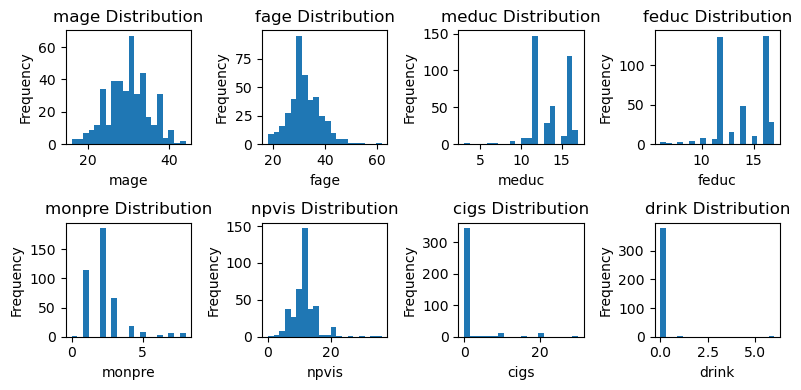

,mage,fage,meduc,feduc,monpre,npvis,cigs,drink
count,409.00,408.00,404.00,401.00,409.00,391.00,381.00,382.00
mean,29.85,32.24,13.66,13.90,2.22,11.57,1.19,0.02
std,5.13,6.14,2.16,2.24,1.33,3.89,4.27,0.32
min,16.00,18.00,3.00,6.00,0.00,0.00,0.00,0.00
25%,27.00,28.00,12.00,12.00,1.00,10.00,0.00,0.00
50%,30.00,32.00,13.00,14.00,2.00,12.00,0.00,0.00
75%,33.00,36.00,16.00,16.00,3.00,13.00,0.00,0.00
max,44.00,62.00,17.00,17.00,8.00,36.00,30.00,6.00


In [9]:
# Checking for distributions

# Columns with missing values (continuous)
col = ['mage', 'fage',  'meduc', 'feduc', 'monpre', 'npvis', 'cigs','drink']

# Create a figure and a grid of subplots
plt.figure(figsize=(8, 4))  # Adjust the size as needed

# Loop through the numerical columns and create a subplot for each one
for index, column in enumerate(col, start=1):  # Start enumeration at 1 for subplot indexing
    plt.subplot(2, 4, index)                   # Create a subplot in the right position
    birth[column].hist(bins=20)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False)

# Adjust the layout so that plots do not overlap
plt.tight_layout()

# Display the plots
plt.show()

# Descriptive statistics for continuous data
birth[col].describe().round(decimals = 2)

<b> Mother's Education (mage) </b> <br>
The distribution of mother's age appears to be roughly symmetric, indicating that it is relatively evenly distributed.<br>

<b> Father's Education (fage) </b> <br>
The data is slightly negatively skewed, indicating that most fathers are older. Missing values could be imputed with the median value.<br>

<b> Education Level (meduc and feduc) </b><br>
The mean education level of mothers (meduc) is 13.66 years, while for fathers (feduc) it is 13.90 years. The data for each is slightly negatively skewed, indicating that most mothers and fathers have higher education levels. Missing values could be imputed with the median education level for each. <br>

<b> Month that Prenatal Care began (monpre) </b><br>
The data is positively skewed, suggesting that most mothers begin prenatal care later in pregnancy. It is worth investigating to identify if duration of pregnancy has an impact on the likelihood of low birthweight. There are no missing values.<br>

<b> Total Number of Prenatal Visits (npvis) </b> <br>
The data is positively skewed indicating that most women have a relatively small number of visits. It might be worth exploring if the frequency of prenatal visits affects the incidence of low birthweight. Missing values could be imputed with the median number of visits for each month that prenatal care began. <br>

<b> Average Number of Cigarettes Smoked Per Day (cigs)</b><br>
The data is highly positively skewed suggesting that most mothers do not smoke during pregnancy. Missing values could be imputed with 0. <br>

<b> Average Number of Alcoholic Drinks Consumed Per Week (drinks) </b>
The data is extremely positively skewed, indicating that most mothers do not consume alcohol during pregnancy. Missing values could be imputed with 0.

<b> Areas Worth Investigating </b> <br>
- Relationship between prenatal care and visits (monpre, npvis) on maternal age (mage), different races, and birth weight. <br>
- Impact of maternal and paternal education levels (meduc, feduc) on birth weight. <br>
- Investigate if there are specific age ranges, both for mother and father, associated with higher or lower risk of low birthweight.
- Influence of maternal age (mage), father's age (fage), and lifestyle choices (smoking and drinking) on birth weight.<br>
- Comparison of birth weight between different racial/ethnic groups (mwhte, mblck, moth, fwhte, fblck, foth).<br>

<b> Further Investigation </b><br>
Data Accuracy of Cigarette and Alcohol Consumption

The significant skewness in the distributions of the number of cigarettes smoked and drinks consumed could suggests potential issues with data accuracy. Future studies could explore the accuracy of the data on cigarette and alcohol consumption, as individuals may underreport these behaviors to their healthcare providers or researchers. Investigating alternative data collection methods or incorporating additional data sources (e.g., medical records) may help improve the accuracy of these variables.

In [10]:
# Creating correlation matrix to understand relationship of age, education, cigarets and drinks
corr_matrix_m = birth[['mage', 'meduc', 'cigs', 'drink']].corr()
corr_matrix_m

,mage,meduc,cigs,drink
mage,1.000000,0.312449,-0.088023,0.038009
meduc,0.312449,1.000000,-0.183644,0.007885
cigs,-0.088023,-0.183644,1.000000,0.249570
drink,0.038009,0.007885,0.249570,1.000000


<b>Correlation between mother's education (mage) and cigarettes (cigs)</b><br>
The analysis indicates a weak correlation between education and number of cigarettes consumed. However, this relationship is not particularly strong. Both smoking and drinking habits are significant lifestyle choices that warrant careful examination in this study. Further investigation and the inclusion of additional information may alter these findings.

In [11]:
# Creating correlation matrix to understand relationship of age, education, npvis, and monpre
corr_matrix = birth[ ['mage', 'meduc', 'npvis', 'monpre', 'mwhte', 'mblck', 'moth', 'bwght'] ].corr()
corr_matrix

,mage,meduc,npvis,monpre,mwhte,mblck,moth,bwght
mage,1.000000,0.312449,0.153132,-0.238884,0.076325,-0.107199,0.011179,0.054616
meduc,0.312449,1.000000,0.057813,-0.225617,-0.003057,-0.134432,0.159842,0.001286
npvis,0.153132,0.057813,1.000000,-0.156406,0.056977,-0.081510,0.010185,0.180625
monpre,-0.238884,-0.225617,-0.156406,1.000000,-0.107724,0.143567,-0.006841,0.055095
mwhte,0.076325,-0.003057,0.056977,-0.107724,1.000000,-0.737180,-0.624724,0.015437
mblck,-0.107199,-0.134432,-0.081510,0.143567,-0.737180,1.000000,-0.067081,0.022982
moth,0.011179,0.159842,0.010185,-0.006841,-0.624724,-0.067081,1.000000,-0.049353
bwght,0.054616,0.001286,0.180625,0.055095,0.015437,0.022982,-0.049353,1.000000


<b>Month prenatal care began (monpre)</b><br>
Negative correlation with mage (mother's age), meduc (mother's education), npvis (number of prenatal visits). It is interesting to study how the timing of prenatal care in combination of these three factors affects birth outcomes.

<b>Number of prenatal visits (npvis)</b><br>
Positive correlation with mage (mother's age) while negative correlation with monpre (month prenatal care began). It is worth looking into how the number of prenatal visits in combination of these two factors impacts birth weight.

Positive correlation with birthweight (bwght) which indicates having adequate prenatal care, indicated by more visits, may lead to healthier birthweights.

<b>Mother's year of education (meduc)</b><br>
Positive correlation with mage (mother's age) while negative correlation with monpre (month prenatal care began). It is interesting to study how different levels of education relate to prenatal care decisions and birth outcomes.

<b>Potential Areas for Deeper Analysis</b>

Age Bracket <br>
- Further analysis could be done to determine which age brackets (e.g., young mothers, middle-aged mothers, elderly mothers) are associated with low or high correlations with other variables. This could provide insights into the impact of age on prenatal care and birth outcomes.

Education Level <br>
- Similarly, exploring the relationship between different education levels and correlations with other variables could reveal patterns related to education and prenatal care.

Race<br>
- Investigating how different racial groups interact with other variables in the dataset could provide insights into disparities in prenatal care and birth outcomes among different racial groups.

<h4> Imputation </h4>

In [12]:
## Cigs and drink

# Imputing with the zero

# cigs
fill = 0
birth['cigs'] = birth['cigs'].fillna(value = fill)

# drink
fill = 0
birth['drink'] = birth['drink'].fillna(value = fill)

## Monpre

# Imputing with median per month of pregnancy that prenatal care began
monpre_medians = []

for month in range(0, 9):
    median_visits = birth.loc[birth['monpre'] == month, 'npvis'].median()
    monpre_medians.append(median_visits)

# Individual medians
monpre_0 = monpre_medians[0]
monpre_1 = monpre_medians[1]
monpre_2 = monpre_medians[2]
monpre_3 = monpre_medians[3]
monpre_4 = monpre_medians[4]
monpre_5 = monpre_medians[5]
monpre_6 = monpre_medians[6]
monpre_7 = monpre_medians[7]
monpre_8 = monpre_medians[8]

# ensuring all missing values for npvis are taken care of

for index, value in birth.iterrows():
    
    if str(birth.loc[index, 'npvis']).lower() == 'nan' and \
        birth.loc[index, 'monpre'] == 0:
        
        birth.loc[index, 'npvis'] = monpre_0
        
    elif str(birth.loc[index, 'npvis']).lower() == 'nan' and \
        birth.loc[index, 'monpre'] == 1:
        
        birth.loc[index, 'npvis'] = monpre_1
        
    elif str(birth.loc[index, 'npvis']).lower() == 'nan' and \
        birth.loc[index, 'monpre'] == 2:
        
        birth.loc[index, 'npvis'] = monpre_2
        
    elif str(birth.loc[index, 'npvis']).lower() == 'nan' and \
        birth.loc[index, 'monpre'] == 3:
        
        birth.loc[index, 'npvis'] = monpre_3
        
    elif str(birth.loc[index, 'npvis']).lower() == 'nan' and \
        birth.loc[index, 'monpre'] == 4:
        
        birth.loc[index, 'npvis'] = monpre_4
        
    elif str(birth.loc[index, 'npvis']).lower() == 'nan' and \
        birth.loc[index, 'monpre'] == 5:
        
        birth.loc[index, 'npvis'] = monpre_5
        
    elif str(birth.loc[index, 'npvis']).lower() == 'nan' and \
        birth.loc[index, 'monpre'] == 6:
        
        birth.loc[index, 'npvis'] = monpre_6
        
    elif str(birth.loc[index, 'npvis']).lower() == 'nan' and \
        birth.loc[index, 'monpre'] == 7:
        
        birth.loc[index, 'npvis'] = monpre_7
        
    elif str(birth.loc[index, 'npvis']).lower() == 'nan' and \
        birth.loc[index, 'monpre'] == 8:
        
        birth.loc[index, 'npvis'] = monpre_8

## fage and meduc

# Imputing with median

# fage
fage_median = birth['fage'].median()

# Impute median to NaN values in 'fage' column
birth.loc[birth['fage'].isna(), 'fage'] = fage_median

# meduc
meduc_median = birth['meduc'].median()

# Impute median to NaN values in 'meduc' column
birth.loc[birth['meduc'].isna(), 'meduc'] = meduc_median

# feduc
feduc_median = birth['feduc'].median()

# Impute median to NaN values in 'meduc' column
birth.loc[birth['feduc'].isna(), 'feduc'] = feduc_median

# Rechecking if all null values are taken care of
print(f"Remaining missing values: {birth.loc[ :, 'foth' ].isnull().sum()}")

Remaining missing values: 0


In [13]:
# # Rechecking missing values 
birth.isnull().sum(axis=0)

mage      0
meduc     0
monpre    0
npvis     0
fage      0
feduc     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h4>Response Variable Transformation</h4>

<b> Low Birth weight </b><br>
Birth weight is a critical indicator of an individual baby's chances of survival, measured as the first weight obtained after birth. At a broader level, the proportion of infants born with low birth weight serves as an indicator of various public health challenges, including maternal malnutrition, inadequate prenatal care, and overall maternal health. Infants with <b>low birth weight</b> are significantly <b>more susceptible to mortality</b>, with a risk approximately <b>20 times higher than those with higher birth weights</b> (UNICEF). This phenomenon is more prevalent in developing countries compared to developed nations (World Health Organization).<br>

Low birth weight (LBW) is defined as a weight at birth of <b>less than 2500 g (~5.5 pounds)</b>, as per the <b>World Health Organization (WHO)</b>. Though, some evidence and studies suggests that this cut-off value may not be suitable for all settings. WHO recommends that countries consider adopting a population-specific cut-off for LBW to guide clinical care. Despite this, the 2500 gram cut-off continues to be widely used in many low- and middle-income countries. (BMC, 2019).

LBW babies are at risk of cognitive deficits, motor delays, cerebral palsy, and other behavior and psychological problems. LBW is also influenced by many other factors such as maternal educational level, residence (urban or rural), family income, maternal occupation and health status, birth order, miscarriage, interpregnancy interval, and multiple pregnancies (Arayeshgari M. et.al, 2023).

Predicting LBW plays a crucial role in preventing health risks for newborns. This analysis employs machine learning models and techniques to predict LBW.

<b> Birth Weight Variable Transformation </b><br>
Instead of solely predicting the birth weight of a baby using the continuous variable "bwght," this analysis focuses on identifying the threshold that distinguishes between a healthy birth weight and a low (unhealthy) birth weight. To achieve this, the birth weight variable (bwght) is transformed into a binary variable "low_bwght" based on the WHO threshold of less than 2500 grams.

In [14]:
birth['low_bwght'] = 0
birth.loc[birth['bwght'] < 2500, 'low_bwght'] = 1

In [15]:
# Dropping birth weight since low birth weight would be the response variable
birth.drop(['bwght'], axis=1, inplace=True)

In [16]:
#!################################!#
#!# set as the response variable #!#
#!################################!#
y_variable = 'low_bwght'

In [17]:
birth['low_bwght'].value_counts()

low_bwght
0    329
1     80
Name: count, dtype: int64

<h4> Correlation with low birthweight (after transformation) </h4>

In [18]:
# creating feature sets
continuous     = ['low_bwght','mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'cigs', 'drink']

non_continuous = ['low_bwght','male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck','foth']


# pearson correlation
lbw_corr = birth[ continuous ].corr(method = 'pearson').round(decimals = 4)


# phi coefficient
lbw_phi_corr = birth[ non_continuous ].phik_matrix(interval_cols = non_continuous).round(decimals = 4)


# checking results
print(f"""
Pearson Correlations
---------------------------
{lbw_corr.loc[ : , 'low_bwght'].sort_values(ascending = False)}


Phi Coefficients
----------------
{lbw_phi_corr.loc[ : , 'low_bwght' ].sort_values(ascending = False)}
""")


Pearson Correlations
---------------------------
low_bwght    1.0000
cigs         0.0508
meduc        0.0292
drink       -0.0152
feduc       -0.0233
mage        -0.0446
monpre      -0.0629
fage        -0.0918
npvis       -0.1325
Name: low_bwght, dtype: float64


Phi Coefficients
----------------
low_bwght    1.0
male         0.0
mwhte        0.0
mblck        0.0
moth         0.0
fwhte        0.0
fblck        0.0
foth         0.0
Name: low_bwght, dtype: float64



<h4> Analysis on correlations and phi coefficients between bwght and low_bwght </h4>

<b> Comparison </b><br>
- After transforming bwght to a binary variable (low_bwght), the <b> correlations and phi coefficients generally decreased in magnitude </b> compared to when bwght was treated as a continuous variable.
- The pearson correlation between low_bwght and the other variables is generally weaker compared to the pearson correlation between bwght and the other variables.
- The phi coefficients for the binary variable low_bwght are all 0, indicating no association with the other variables.

<b> Insights </b><br>
- The transformation of bwght to a binary variable with a threshold of < 2500 essentially dichotomizes the data, which can lead to a loss of information and potentially reduce the strength of associations between variables.
- The decrease in correlations and phi coefficients after transformation suggests that the relationship between birthweight and the other variables is not as strong when using the binary variable.
- This could be due to the loss of information inherent in dichotomizing a continuous variable, as well as the arbitrary nature of the threshold chosen for the transformation.
- However, it might be interesting to <b>explore further in each variables</b> such as (1) if there are specific age brackets where the correlation is more pronounced, (2) optimal number and timing of prenatal visits for reducing the risk of low birth weight and (3) if there is a specific education level or range of education levels that is more strongly associated with low birth weight.
- The phi coefficients for race variables (mwhte, mblck, moth, fwhte, fblck, foth) indicate no significant association with low birth weight. However, it is worth exploring to check if there are specific race/ethnic groups within these categories that are more or less likely to have low birth weight babies.

<h3> Part III - Feature Engineering </h3>

In [19]:
## Feature 1: Inadequate Prenatal visit (less than 8) ##
birth['ivisit'] = 0
birth.loc[birth['npvis'] <= 8, 'ivisit'] = 1

## Feature 2: Inadequate Prenatal visit | Mother's Race ##
birth['ivisit_mwhte'] = birth['ivisit'] * birth['mwhte']
birth['ivisit_mblck'] = birth['ivisit'] * birth['mblck']
birth['ivisit_moth'] = birth['ivisit'] * birth['moth']

## Feature 3: Mother's Age & Starting Month of Prenatal care ##
birth['mage_monpre'] = birth['mage'] * birth['monpre']

## Feature 4: Mother's Age Category
birth['mteen'] = 0
birth['madolescent'] = 0
birth['myoung'] = 0
birth['mmiddleaged'] = 0
birth['madult'] = 0

birth.loc[(birth['mage'] >= 15) & (birth['mage'] <= 19), 'mteen'] = 1
birth.loc[(birth['mage'] >= 20) & (birth['mage'] <= 24), 'madolescent'] = 1
birth.loc[(birth['mage'] >= 25) & (birth['mage'] <= 29), 'myoung'] = 1
birth.loc[(birth['mage'] >= 30) & (birth['mage'] <= 34), 'mmiddleaged'] = 1
birth.loc[birth['mage'] > 34, 'madult'] = 1

## Feature 5: Mother of White Race | Adult (>34 y/o)
birth['mwhte_madult'] = birth['mwhte'] * birth['madult']

## Feature 6: Mother's Education Level
birth['mlesshs'] = 0        # less than high school
birth['mhighschool'] = 0    # high school 
birth['mposths'] = 0        # post high school (GED)
birth['mcollege'] = 0       # college

birth.loc[birth['meduc'] <= 7, 'mlesshs'] = 1
birth.loc[(birth['meduc'] > 7) & (birth['meduc'] <= 12), 'mhighschool'] = 1
birth.loc[(birth['meduc'] > 12) & (birth['meduc'] <= 15), 'mposths'] = 1
birth.loc[birth['meduc'] > 15, 'mcollege'] = 1

## Feature 7 : Month of Prenatal Care Began | Race
birth['monpre_mwhte'] = birth['monpre'] * birth['mwhte']
birth['monpre_mblck'] = birth['monpre'] * birth['mblck']
birth['monpre_moth'] = birth['monpre'] * birth['moth']

<b> Feature 1 Inadequate Prenatal Visit (ivisit) </b><br>
In a study conducted in North Dakota, prenatal visits were categorized as inadequate (< 8 visits), intermediate (9-12 visits), and adequate (12+ visits) and this feature is focused on the inadequate visits. Regular prenatal visits are crucial for preventing preterm births and low-birth-weight babies. These visits provide access to healthcare services, allowing expectant mothers to receive regular check-ups and stay informed about potential complications. In a typical uncomplicated pregnancy, these visits occur approximately every four weeks until around week 36. However, the frequency of visits can vary based on the individual pregnancy, with higher-risk pregnancies requiring more frequent appointments. According to the NCBI, initiating prenatal care during the first three months of pregnancy reduces the risk of low birth weight. This is further highlighted by March Dimes (2022) by the result of the study that most women who gave birth in 2021 received prenatal care, 81.7% of women received first-trimester prenatal care, 12.6 percent of women received care in the second trimester and 5.7% of women received late or no prenatal care.

<b> Feature 2 Less Prenatal Visit | Mother (White Race) (ivisit_mwhte) </b><br>
Analyzing the interactions between various racial groups and other variables in the dataset could offer valuable insights into the disparities in prenatal care and birth outcomes among different races. For instance, a study in North Dakota revealed that individuals identified as "white" had an 8.8% rate of inadequate prenatal care. Additionally, data from the Centers for Disease Control (2021) suggests that birth rates among American Indians are higher compared to those among white individuals (16.99 vs. 12.00).<br>

<b> Feature 3 Mother's Age & Starting Month of Prenatal Care (mage_monpre) </b> <br>
Maternal age is also an important factor leading to LBW and preterm births. Advanced maternal age, defined as 35 years or older at the time of childbirth, is a widely recognized risk factor for adverse birth outcomes. Older mothers are more susceptible to experiencing low birth weight, preterm birth, perinatal mortality, and are more likely to require early and specialized care. Adequate prenatal care plays a crucial role in ensuring a healthy pregnancy and birth, particularly for older women. A study published in the International Journal of Gynecology and Obstetrics in February 2023 found that the utilization of prenatal care is most inadequate among the oldest women (aged 45-49 years) but lowest among those aged 35-39 years.

<b> Feature 4 Mother Age Bracket (mteen, madolescent, myoung, mmiddleaged, madult)  </b><br>
In relation to Feature 3, this aspect is more detailed, focusing on different age groups. It is intriguing to investigate and validate in this analysis which specific maternal age groups are more susceptible to low birth weight. Existing research highlights that teenage mothers face an increased risk of preterm birth and low birth weight, while older mothers also have a higher risk of maternal complications. Similarly, a study conducted in North Dakota noted that maternal age is a contributing factor to low birth weight, with the youngest and oldest mothers in the U.S. exhibiting higher rates of low birth weight (March of Dimes, 2022).

<b> Feature 5 Mother (White Race) | Adult Mother (> 34 y/o) </b><br>
This feature focuses on women aged 34 and above, specifically of white ethnicity. Its purpose is to examine whether birth weight is more significant among older mothers and to draw attention to potential disparities in birth outcomes related to race and ethnicity. Additionally, it aims to investigate the presence of systemic racism and inequalities affecting birth rates across different racial groups, and to determine which age group is more likely to experience low birth weight.
Birth rates among American Indians are higher than among White (16.99 vs. 12.00; Centers for Disease Control, WONDER, 2021).

<b> Feature 6 Mother Education Level (mlesshs, mhighschool, mposths, mcollege) </b><br>
The decision to undergo prenatal visits and make wise decisions can be influenced by factors such as socioeconomic status, including the mother's level of education. This is particularly important in emphasizing the importance of prenatal care in monitoring the baby's health. Women with higher education levels are more likely to be informed about self-care practices, possess greater knowledge about necessary care, have a higher socioeconomic standing, and exhibit better decision-making abilities regarding their health.

<h4>Correlation Analysis with new features <h4>

In [20]:
# creating feature sets
continuous     = ['low_bwght', 'mage','fage', 'meduc','feduc', 'monpre', 'npvis', 'mage_monpre',
                  'cigs', 'drink', 'monpre_mwhte', 'monpre_mblck', 'monpre_moth' ]

non_continuous = ['low_bwght', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth',
                  'male', 'ivisit', 'ivisit_mwhte', 'ivisit_mblck', 'ivisit_moth',
                  'mteen', 'myoung', 'madolescent', 'mmiddleaged', 'madult', 
                  'mwhte_madult', 'mlesshs', 'mhighschool', 'mposths', 'mcollege' ]

# pearson correlation
birth_corr = birth[ continuous ].corr(method = 'pearson').round(decimals = 4)


# phi coefficient
birth_phi_corr = birth[ non_continuous ].phik_matrix(interval_cols = non_continuous).round(decimals = 4)


# checking results
print(f"""
Point-Biserial Correlations
---------------------------
{birth_corr.loc[ : , 'low_bwght' ].sort_values(ascending = False)}


Phi Coefficients
----------------
{birth_phi_corr.loc[ : , 'low_bwght' ].sort_values(ascending = False)}
""")


Point-Biserial Correlations
---------------------------
low_bwght       1.0000
cigs            0.0508
meduc           0.0292
monpre_mwhte   -0.0054
drink          -0.0152
feduc          -0.0233
mage           -0.0446
monpre_moth    -0.0455
monpre_mblck   -0.0543
monpre         -0.0629
mage_monpre    -0.0879
fage           -0.0918
npvis          -0.1325
Name: low_bwght, dtype: float64


Phi Coefficients
----------------
low_bwght       1.0000
ivisit_mwhte    0.3496
ivisit          0.3184
mteen           0.1107
mwhte_madult    0.0299
mposths         0.0000
mhighschool     0.0000
mlesshs         0.0000
madult          0.0000
mmiddleaged     0.0000
madolescent     0.0000
myoung          0.0000
ivisit_moth     0.0000
mwhte           0.0000
ivisit_mblck    0.0000
male            0.0000
foth            0.0000
fblck           0.0000
fwhte           0.0000
moth            0.0000
mblck           0.0000
mcollege        0.0000
Name: low_bwght, dtype: float64



<b> Point-Biserial Correlations </b> <br>
- cigs (0.0508), meduc (0.0292), monpre_mwhte (-0.0054), drink (-0.0152), feduc (-0.0233), mage (-0.0446), monpre_moth (-0.0455), monpre_mblck (-0.0543), monpre (-0.0629), mage_monpre (-0.0879), fage (-0.0918), and npvis (-0.1325) have relatively weak correlations with low_bwght. The negative signs indicate a negative correlation, suggesting that as the values of these variables increase, the likelihood of low birth weight decreases.

<b> Phi Coefficients </b> <br>
- ivisit_mwhte (0.3496), ivisit (0.3184), mteen (0.1107), and mwhte_madult (0.0299) have positive correlations with low_bwght, indicating that higher values in these variables are associated with a higher likelihood of low birth weight.

- Other variables, such as mposths, mhighschool, mlesshs, madult, mmiddleaged, madolescent, myoung, ivisit_moth, mwhte, ivisit_mblck, male, foth, fblck, fwhte, moth, mblck, and mcollege, have a correlation of 0.0000 with low_bwght, suggesting no linear relationship between these variables and low birth weight.

<h4> Skewness and Yeo-Johnson Transformation </h4>

In [21]:
# yeo-johnson transformation
birth_original = birth.copy()

# List of numerical features to transform
x_skewed = ['mage', 'meduc', 'monpre', 'npvis', 'fage', 
            'feduc', 'cigs', 'drink']

# Initialize the PowerTransformer with the Yeo-Johnson method
transformer = PowerTransformer(method='yeo-johnson')

# Fit the transformer to the numerical features and transform them
birth[x_skewed] = transformer.fit_transform(birth[x_skewed])

# Check the transformed features
birth[x_skewed].describe()

,mage,meduc,monpre,npvis,fage,feduc,cigs,drink
count,4.090000e+02,4.090000e+02,4.090000e+02,4.090000e+02,4.090000e+02,4.090000e+02,4.090000e+02,4.090000e+02
mean,-3.908854e-17,-8.860068e-16,4.256307e-16,-1.845848e-16,2.779629e-16,2.041290e-16,-5.646122e-17,-5.646122e-17
std,1.001225e+00,1.001225e+00,1.001225e+00,1.001225e+00,1.001225e+00,1.001225e+00,1.001225e+00,1.001225e+00
min,-2.688519e+00,-3.515065e+00,-4.629901e+00,-4.802451e+00,-2.889279e+00,-2.606006e+00,-3.106677e-01,-9.938080e-02
25%,-5.586435e-01,-8.153616e-01,-1.289735e+00,-3.560601e-01,-6.615296e-01,-9.227677e-01,-3.106677e-01,-9.938080e-02
50%,2.679366e-02,-3.684600e-01,9.343653e-02,1.929854e-01,4.108987e-02,-5.540200e-02,-3.106677e-01,-9.938080e-02
75%,6.138166e-01,1.138680e+00,8.841138e-01,1.929854e-01,6.719970e-01,9.779386e-01,-3.106677e-01,-9.938080e-02
max,2.777813e+00,1.695637e+00,2.484506e+00,4.871480e+00,3.718477e+00,1.558939e+00,3.221088e+00,1.006231e+01


In [22]:
# List of non-binary columns to standardize
non_binary_columns = ['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 
                      'cigs', 'drink']

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()

# FITTING the scaler with the non-binary data
scaler.fit(birth[non_binary_columns])

# TRANSFORMING the non-binary data
birth[non_binary_columns] = scaler.transform(birth[non_binary_columns])

# Checking the first 5 rows of the dataframe
birth.head(n=5)

,mage,meduc,monpre,npvis,fage,feduc,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,low_bwght,ivisit,ivisit_mwhte,ivisit_mblck,ivisit_moth,mage_monpre,mteen,madolescent,myoung,mmiddleaged,madult,mwhte_madult,mlesshs,mhighschool,mposths,mcollege,monpre_mwhte,monpre_mblck,monpre_moth
bwt_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bwt_1,-0.363684,-0.815362,0.093437,-0.356060,-0.127187,1.558939,-0.310668,-0.099381,0,1,0,0,1,0,0,0,0,0,0,0,56,0,0,1,0,0,0,0,1,0,0,2,0,0
bwt_2,-1.724059,-0.368460,-1.289735,-1.634576,-2.129159,-0.055402,-0.310668,-0.099381,0,1,0,0,1,0,0,1,1,1,0,0,21,0,1,0,0,0,0,0,0,1,0,1,0,0
bwt_3,-0.558644,0.608841,0.093437,-0.075702,0.041090,0.977939,-0.310668,-0.099381,1,1,0,0,1,0,0,0,0,0,0,0,54,0,0,1,0,0,0,0,0,1,0,2,0,0
bwt_4,0.613817,1.695637,-1.289735,2.043791,1.106689,1.558939,-0.310668,-0.099381,0,0,0,1,0,0,1,0,0,0,0,0,33,0,0,0,1,0,0,0,0,0,1,0,0,1
bwt_5,0.026794,0.608841,0.093437,0.192985,0.671997,0.977939,-0.310668,-0.099381,1,1,0,0,1,0,0,0,0,0,0,0,60,0,0,0,1,0,0,0,0,1,0,2,0,0


In [23]:
new_continuous_columns = ['mage_monpre', 'monpre_mwhte', 'monpre_mblck', 'monpre_moth']
                          
# Initialize the PowerTransformer with the Yeo-Johnson method
transformer = PowerTransformer(method='yeo-johnson')

# Fit the transformer to the numerical features and transform them
birth[new_continuous_columns] = transformer.fit_transform(birth[new_continuous_columns])

# Check the transformed features
birth[new_continuous_columns].describe()

# Instantiating a new StandardScaler object for the new continuous features
new_scaler_c = StandardScaler()

# Fitting the new scaler with the new continuous data
new_scaler_c.fit(birth[new_continuous_columns])

# Transforming the new continuous features
birth[new_continuous_columns] = new_scaler_c.transform(birth[new_continuous_columns])


In [24]:
new_binary_columns = ['ivisit', 'ivisit_mwhte', 'ivisit_mblck', 'ivisit_moth',
                      'mteen', 'myoung', 'madolescent', 'mmiddleaged', 'madult', 
                      'mwhte_madult', 'mlesshs', 'mhighschool', 'mposths', 'mcollege',
                      'male', 'mblck', 'mwhte', 'moth', 'fblck', 'fwhte', 'foth']

# Instantiating a new StandardScaler object for the new continuous features
new_scaler_b = StandardScaler()

# Fitting the new scaler with the new continuous data
new_scaler_b.fit(birth[new_continuous_columns])

# Transforming the new continuous features
birth[new_continuous_columns] = new_scaler_b.transform(birth[new_continuous_columns])

<h4> Base Modeling (significant p values only)</h4>

In [25]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula   = """low_bwght ~ 
                                          ivisit_mwhte +
                                          mteen +
                                          mwhte_madult + 
                                          mage_monpre +
                                          mwhte_madult 
                                          """,
                                  data = birth)

# FITTING the model object
results_logistic = logistic_small.fit()

# checking the results SUMMARY
results_logistic.summary2() 

Optimization terminated successfully.
         Current function value: 0.454079
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: low_bwght        Pseudo R-squared: 0.081     
Date:               2024-04-22 15:24 AIC:              381.4363  
No. Observations:   409              BIC:              401.5049  
Df Model:           4                Log-Likelihood:   -185.72   
Df Residuals:       404              LL-Null:          -202.14   
Converged:          1.0000           LLR p-value:      1.2805e-06
No. Iterations:     6.0000           Scale:            1.0000    
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept        -1.9083   0.1749 -10.9096 0.0000 -2.2511 -1.5654
ivisit_mwhte      1.5079   0.3086   4.8867 0.0000  0.9031  2.1126
mteen             1.5376   0.7653   2.0092 0.0445  0.0377  3.0376
mwhte_madult      0.6101   0.3312   1.8423 0.0654 -0.0390  1.2593
mage_monpre      -0.3471   0.1371  -2.5313 0.0114 -0.6158 -0.0783
=================================================================

"""

<h4> Preparing Training Data <h4>

In [26]:
# Prepare the training data for modeling
birth_target = birth['low_bwght']

# Define the features based on the dataset columns

sel_features = [ 'mlesshs', 'mhighschool',  'mposths', 'mcollege',
                 'ivisit_mwhte', 'ivisit_moth', 'ivisit_mblck', 'ivisit', 
                 'mteen', 'myoung', 'madolescent', 'mmiddleaged', 'madult',
                 'mwhte_madult', 'mage_monpre', 'monpre_mwhte', 'monpre_mblck', 'monpre_moth'
                 ]

# Using core features
birth_data = birth[sel_features]
birth_data.head(n=2)

,mlesshs,mhighschool,mposths,mcollege,ivisit_mwhte,ivisit_moth,ivisit_mblck,ivisit,mteen,myoung,madolescent,mmiddleaged,madult,mwhte_madult,mage_monpre,monpre_mwhte,monpre_mblck,monpre_moth
bwt_id,,,,,,,,,,,,,,,,,,
bwt_1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,-0.068726,0.254260,-0.281346,-0.238427
bwt_2,0,0,1,0,1,0,0,1,0,0,1,0,0,0,-1.748425,-0.585258,-0.281346,-0.238427


<h4> Class Imbalance </h4>

In [27]:
birth['low_bwght'].value_counts(normalize = True).round(decimals = 2)

low_bwght
0    0.8
1    0.2
Name: proportion, dtype: float64

<h3> Candidate Model Development </h3>

<b>Handling Imbalanced Data</b><br>
Based on the value count results of low bwght variable, we have imbalanced data. Proportion in Class 0 are much higher than the Class 1 and this means that the model will predict the majority class (not low birthweight), hence, having major misclassification of the minority class (low birthweight) in comparison with the majority class. To address this issue, larger weights will be assigned to the minority class (Class 1, representing low birth weight) and smaller weights to the majority class (Class 0, representing not low birth weight) in the following models below.This approach aims to penalize misclassifications of the minority class more heavily during model training, ultimately improving the model's ability to correctly classify instances of low birth weight.

Stratified train-test split is also employed to ensure that the train and test sets have approximately the same percentage of samples of each target class as the complete set.

<b>Candidate Models</b><br>
In this analysis, <b>Decision Tree, Random Forest, and Gradient Boosting Machine (GBM) Classification </b> were chosen as the top three models for their ability to handle non-linear relationships and imbalanced data which is crucial due to the low proportion of low birth weight cases. Tree-based algorithms often perform well on imbalanced datasets while boosting algorithm is also ideal for imbalanced datasets because higher weight is given to the minority class at each successive iteration. During each iteration in training the weights of misclassified classes are adjusted.

These models offer a balance between interpretability and predictive power, making them suitable for complex classification tasks like predicting low birth weight. On the other hand, the interpretability of the Ridge Classification model is low, the KNN can perform poorly with imbalanced data, and the Logistic Regression may not work well with complex feature associations.

<h4> Train-Test Split </h4>

In [28]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(birth_data, 
                                                    birth_target, 
                                                    test_size    = 0.25, 
                                                    random_state = 219,
                                                    stratify     = birth_target)

<h4> Base Modeling with default parameters </h4>

In [29]:
# Candidate Model Development (using default values)
models = {
   
    'Decision Tree Classification': DecisionTreeClassifier(class_weight      = None, 
                                                           splitter          = 'best',
                                                           criterion         = 'gini',
                                                           max_depth         = None,
                                                           min_samples_leaf  = 1, 
                                                           min_samples_split = 2,
                                                           max_leaf_nodes    = None,
                                                           random_state      = 219),
    
    'Random Forest Classification': RandomForestClassifier(class_weight      = None, 
                                                           n_estimators      = 100,
                                                           criterion         = 'gini',
                                                           min_samples_leaf  = 1,
                                                           min_samples_split = 2,
                                                           max_depth         = None,
                                                           bootstrap         = True,
                                                           warm_start        = False,
                                                           random_state      = 219),
    
    'Ridge Classification':                RidgeClassifier(alpha             = 1.0,
                                                           max_iter          = None,
                                                           class_weight      = None,
                                                           solver            = 'auto',
                                                           random_state      = 219),
    
    'Logistic Regression' :                LogisticRegression(solver         = 'lbfgs',
                                                              penalty        = 'l2',
                                                              class_weight   = None,
                                                                          C  = 1.0, 
                                                              random_state   = 219),

    
    'GBM Classification': GradientBoostingClassifier(      n_estimators      = 100, 
                                                           learning_rate     = .1, 
                                                           max_depth         = 3,
                                                           min_samples_leaf  = 1,
                                                           min_samples_split = 2,
                                                           loss              = 'log_loss',
                                                           criterion         = 'friedman_mse',
                                                           warm_start        = False,
                                                           random_state      = 219)
        }

# List to hold model performance data
model_performance_data = []

# Train and evaluate each model
for name, model in models.items():
    
    # FITTING the training data
    model_fit = model.fit(x_train, y_train)
        
    # PREDICTING based on the testing set
    model_pred = model_fit.predict(x_test)
    
    # saving scoring data for future use
    train_score = model_fit.score(x_train, y_train)
    test_score  = model_fit.score(x_test, y_test)
    tt_gap      = train_score - test_score
    
    # Unpacking the confusion matrix
    model_tn, model_fp, model_fn, model_tp = confusion_matrix(y_true=y_test, y_pred = model_pred).ravel()
    
    # Preparing AUC, precision, and recall
    auc       = round(roc_auc_score(y_true=y_test, y_score=model_pred), 4)
    precision = round(precision_score(y_true=y_test, y_pred=model_pred), 4)
    recall    = round(recall_score(y_true=y_test, y_pred=model_pred), 4)
    
    # Creating model performance data
    model_performance_data.append({
        'Model Name': name,
        'Training Accuracy': round(train_score, 4),
        'Testing Accuracy': round(test_score, 4),
        'Train-Test Gap': round(tt_gap, 4),
        'AUC': auc,
        'Precision': precision,
        'Recall': recall,
        'TP': model_tp,
        'FP': model_fp,
        'TN': model_tn,
        'FN': model_fn,       
    })

# Create DataFrame from model performance data
model_performance_df = pd.DataFrame(model_performance_data)

# Calculate F1 score and add it to the model performance data
model_performance_df['f-1 Score'] = 2 * (model_performance_df['Precision'] * model_performance_df['Recall']) / \
                                       (model_performance_df['Precision'] + model_performance_df['Recall'])

# Display the updated model performance DataFrame
model_performance_df

,Model Name,Training Accuracy,Testing Accuracy,Train-Test Gap,AUC,Precision,Recall,TP,FP,TN,FN,f-1 Score
0,Decision Tree Classification,0.9085,0.7379,0.1706,0.5337,0.2667,0.20,4,11,72,16,0.228584
1,Random Forest Classification,0.9085,0.7476,0.1609,0.5587,0.3125,0.25,5,11,72,15,0.277778
2,Ridge Classification,0.8039,0.7961,0.0078,0.4940,0.0000,0.00,0,1,82,20,NaN
3,Logistic Regression,0.8072,0.8058,0.0014,0.5190,0.5000,0.05,1,1,82,19,0.090909
4,GBM Classification,0.8791,0.7767,0.1024,0.5009,0.2000,0.05,1,4,79,19,0.080000


In [30]:
# INSTANTIATING a decision tree model with default hyperparameters
model_dt = DecisionTreeClassifier( class_weight      = None,
                                   splitter          = 'best',
                                   criterion         = 'gini',
                                   max_depth         = None,
                                   min_samples_leaf  = 1, 
                                   min_samples_split = 2,
                                   max_leaf_nodes    = None,
                                   random_state      = 219)
# fitting the model object
model_dt.fit(x_train, y_train)

# Predicting on the test data
pred_test_dt = model_dt.predict(x_test)

# Getting the predicted probabilities for the positive class
probabilities_dt = model_dt.predict_proba(x_test)[:, 1]

# Defining a threshold
threshold_dt = 0.5 

# Applying the threshold to convert probabilities into binary predictions
pred_test_threshold_dt = (probabilities_dt >= threshold_dt).astype(int)

f1_test_threshold_dt = f1_score(y_test, pred_test_threshold_dt)
print('F-1 Score:', f1_test_threshold_dt.round(decimals = 4))

# Calculating precision and recall scores
precision_test_dt = precision_score(y_test, pred_test_threshold_dt)
recall_test_dt    = recall_score(y_test, pred_test_threshold_dt)

# unpacking the confusion matrix
lr_tuned_tn_threshold, \
lr_tuned_fp_threshold, \
lr_tuned_fn_threshold, \
lr_tuned_tp_threshold = confusion_matrix(y_true = y_test, y_pred = pred_test_threshold_dt).ravel()

# printing results
print(f"""
True Negatives: {lr_tuned_tn_threshold}
False Positives: {lr_tuned_fp_threshold}
False Negatives: {lr_tuned_fn_threshold}
True Positives: {lr_tuned_tp_threshold}
""")
print(f"Precision: {precision_test_dt.round(decimals = 4)}")
print(f"Recall: {recall_test_dt.round(decimals = 4)}")

F-1 Score: 0.1818

True Negatives: 63
False Positives: 20
False Negatives: 16
True Positives: 4

Precision: 0.1667
Recall: 0.2


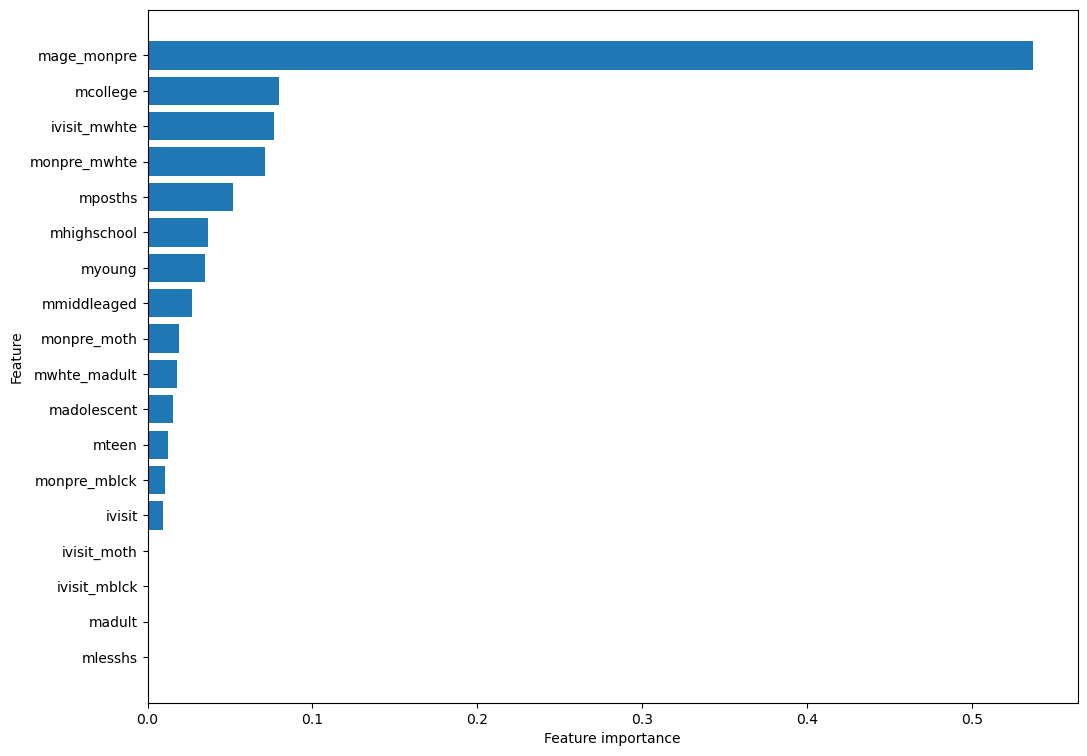

In [31]:
# plotting feature importances
plot_feature_importances(model = model_dt, train = x_train)

<h4> Hyperparameter Tuning </h4>

<h4> Decision Tree </h4>

In [32]:
# # Hyperparameter Tuning for Decision Tree

# # Define the parameter grid for Decision Tree
# param_grid_dt = { 'criterion' : ['gini', 'entropy', 'log_loss'],
#                   'splitter'  : ['best', 'random'],
#                   'max_depth' : np.arange(1, 12, 1),
#                   'min_samples_leaf' : np.arange(1, 8, 1),
#                   'min_samples_split': np.arange(2, 8, 1),
#                   'max_leaf_nodes': np.arange(2, 8, 1), 
#                 }

# # INSTANTIATING the model object without hyperparameters
# dt_grid = DecisionTreeClassifier(random_state = 219)
        
# # GridSearchCV object
# dt_cv = RandomizedSearchCV(estimator               =  dt_grid,
#                                param_distributions = param_grid_dt,
#                                cv                  = 5,
#                                n_iter              = 1000,
#                                scoring             = make_scorer(roc_auc_score,
#                                                      needs_threshold = False))

# # FITTING to the FULL DATASET (due to cross-validation)
# dt_cv.fit(x_train, y_train)


# # PREDICT step is not needed

# # printing the optimal parameters and best score
# print("Tuned Parameters  :", dt_cv.best_params_)
# print("Tuned Training AUC:", dt_cv.best_score_.round(decimals = 4))

In [33]:
# After tuning

# INSTANTIATING a decision tree
model_dt = DecisionTreeClassifier( class_weight      = {0: .05, 1: .95},
                                   criterion         = 'entropy',
                                   splitter          = 'random',
                                   max_depth         = 4,
                                   min_samples_leaf  = 8, 
                                   min_samples_split = 5,
                                   max_leaf_nodes    = 9,
                                   random_state      = 219)
# fitting the model object
model_dt.fit(x_train, y_train)

# Predicting on the test data
pred_test_dt = model_dt.predict(x_test)

# Getting the predicted probabilities for the positive class
probabilities_dt = model_dt.predict_proba(x_test)[:, 1]

# Defining a threshold
threshold_dt = 0.5

# Applying the threshold to convert probabilities into binary predictions
pred_test_threshold_dt = (probabilities_dt >= threshold_dt).astype(int)

# Calculating and printing the f1 score 
f1_test_threshold_dt = f1_score(y_test, pred_test_threshold_dt)
print('F-1 Score:', f1_test_threshold_dt.round(decimals = 4))

# Calculating precision and recall scores
precision_test_dt = precision_score(y_test, pred_test_threshold_dt)
recall_test_dt    = recall_score(y_test, pred_test_threshold_dt)

# unpacking the confusion matrix
dt_tuned_tn_threshold, \
dt_tuned_fp_threshold, \
dt_tuned_fn_threshold, \
dt_tuned_tp_threshold = confusion_matrix(y_true = y_test, y_pred = pred_test_threshold_dt).ravel()

# printing each result 
print(f"""
True Negatives: {dt_tuned_tn_threshold}
False Positives: {dt_tuned_fp_threshold}
False Negatives: {dt_tuned_fn_threshold}
True Positives: {dt_tuned_tp_threshold}
""")
print(f"Precision: {precision_test_dt.round(decimals = 4)}")
print(f"Recall: {recall_test_dt.round(decimals = 4)}")

F-1 Score: 0.3306

True Negatives: 2
False Positives: 81
False Negatives: 0
True Positives: 20

Precision: 0.198
Recall: 1.0


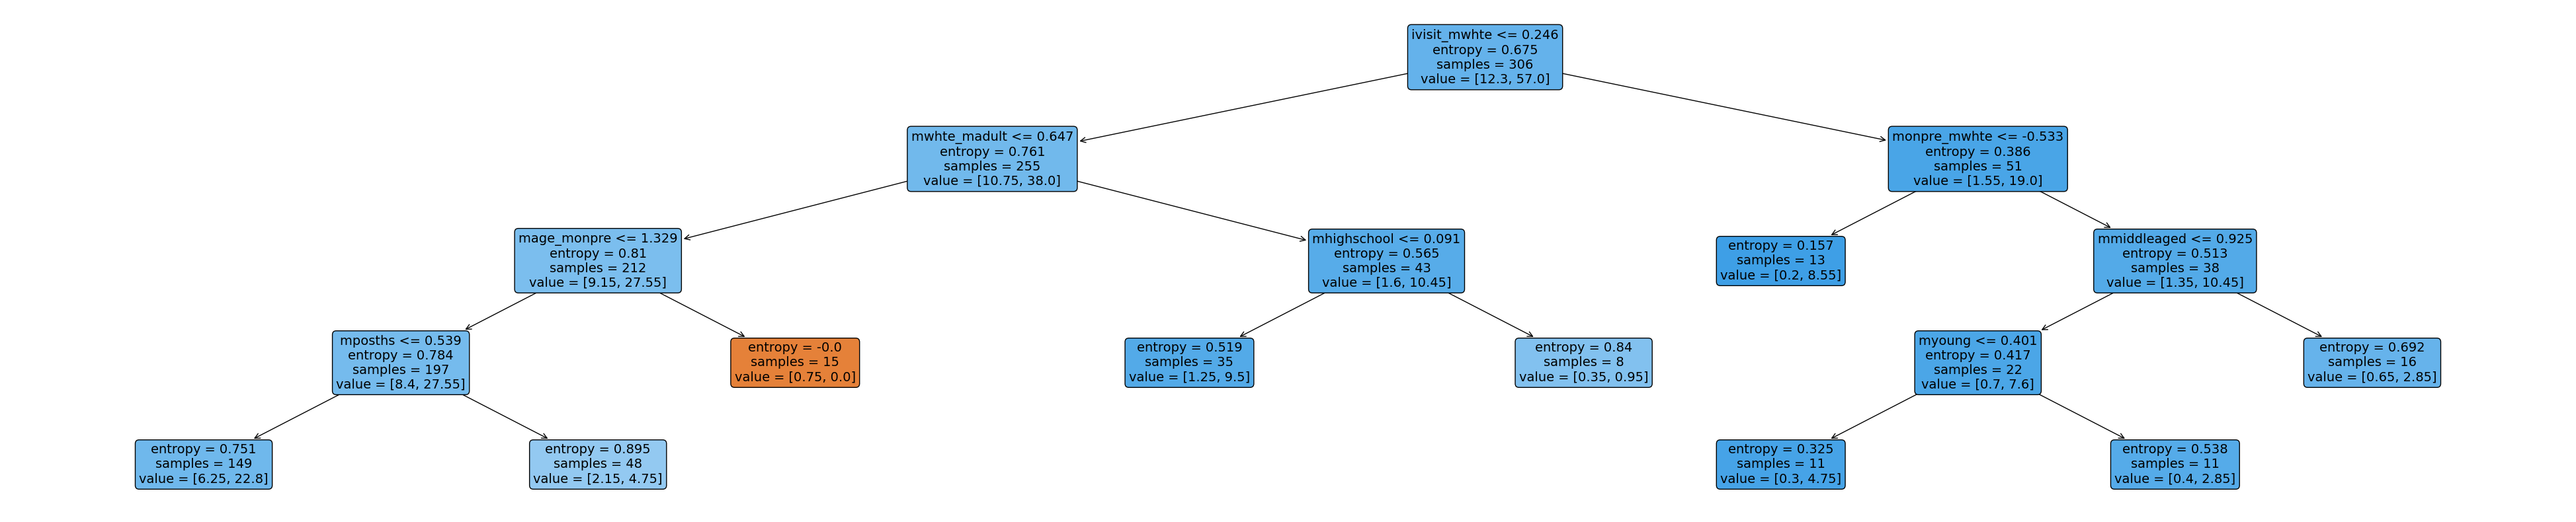

In [34]:
# setting figure size
plt.figure(figsize=(50, 10)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = model_dt, # changing to pruned_tree_fit
          feature_names = list(x_train.columns),
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

<h4> After Pruning </h4>

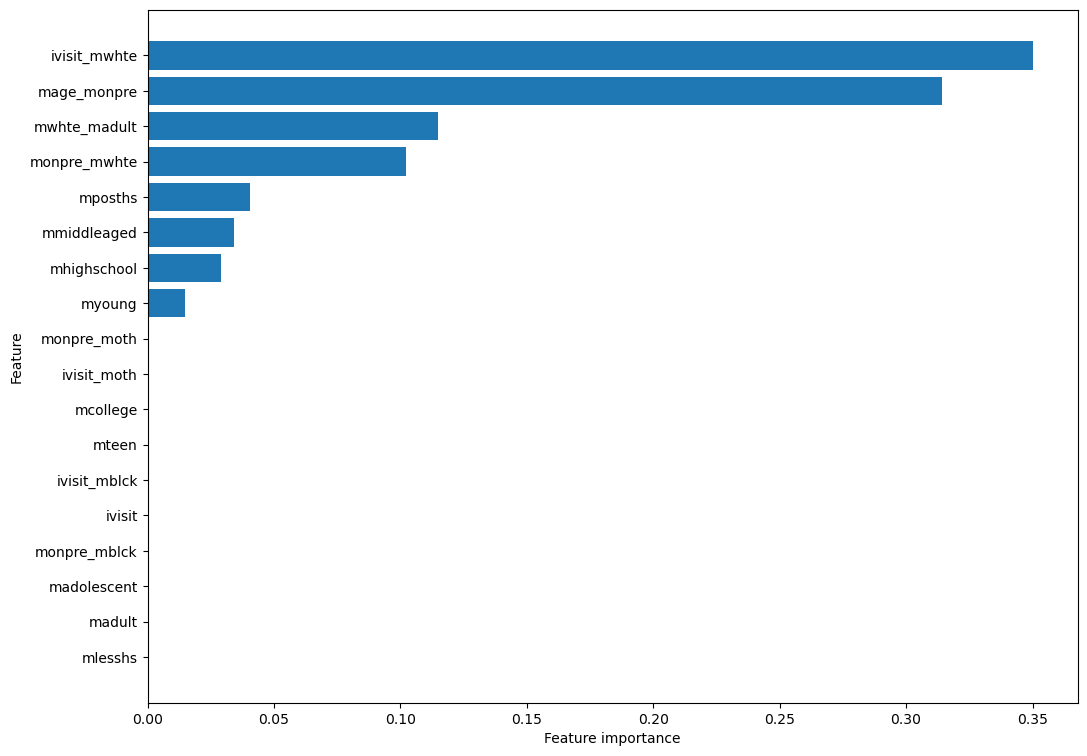

In [35]:
# plotting feature importances
plot_feature_importances(model=model_dt, train=x_train)

<h4> Ridge Classification Model </h4>

In [36]:
# INSTANTIATING a Ridge Classification 
model_rdg = rdg_tuned = RidgeClassifier(alpha             = 1,
                                        class_weight      = None,
                                        solver            = 'auto',
                                        random_state      = 219)
# fitting the model object
model_rdg.fit(x_train, y_train)

# Predicting on the test data
pred_test_rdg = model_rdg.predict(x_test)

# Calculating and printing the f1 score 
f1_test_rdg = f1_score(y_test, pred_test_rdg)
print('F-1 Score:', f1_test_rdg.round(decimals = 4))

# Calculating precision and recall scores
precision_test_rdg = precision_score(y_test, pred_test_rdg)
recall_test_rdg    = recall_score(y_test, pred_test_rdg)

# unpacking the confusion matrix
rdg_tuned_tn_threshold, \
rdg_tuned_fp_threshold, \
rdg_tuned_fn_threshold, \
rdg_tuned_tp_threshold = confusion_matrix(y_true = y_test, y_pred = pred_test_rdg).ravel()

# printing each result one-by-one
print(f"""
True Negatives: {rdg_tuned_tn_threshold}
False Positives: {rdg_tuned_fp_threshold}
False Negatives: {rdg_tuned_fn_threshold}
True Positives: {rdg_tuned_tp_threshold}
""")
print(f"Precision: {precision_test_rdg.round(decimals = 4)}")
print(f"Recall: {recall_test_rdg.round(decimals = 4)}")

F-1 Score: 0.0

True Negatives: 82
False Positives: 1
False Negatives: 20
True Positives: 0

Precision: 0.0
Recall: 0.0


In [37]:
# # Hyperparameter Tuning for Ridge

# # Define the parameter grid for Ridge
# param_grid_rdg = { 'solver'      : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg','sag', 'saga'],
#                    'alpha'       : np.arange(1, 20, 1),
#                 }

# # INSTANTIATING the model object without hyperparameters
# rdg_grid = RidgeClassifier(random_state = 219)
        
# # GridSearchCV object
# rdg_cv = RandomizedSearchCV(estimator              =  rdg_grid,
#                                param_distributions = param_grid_rdg,
#                                cv                  = 5,
#                                n_iter              = 1000,
#                                scoring             = make_scorer(roc_auc_score,
#                                                      needs_threshold = False),
#                             random_state           = 219)

# # FITTING to the FULL DATASET (due to cross-validation)
# rdg_cv.fit(x_train, y_train)

# # printing the optimal parameters and best score for each metric
# print("Tuned Parameters  :", rdg_cv.best_params_)
# print("Tuned Training AUC:", rdg_cv.best_score_.round(decimals = 4))

In [38]:
# After tuning
# INSTANTIATING a Ridge Classification 
model_rdg = RidgeClassifier(alpha             = .5,
                            class_weight      = {0:0.95, 0:0.05},
                            solver            = 'auto', 
                            random_state      = 219)

# fitting the model object
model_rdg_fit = model_rdg.fit(x_train, y_train)

# Predicting on the test data
pred_test_rdg = model_rdg_fit.predict(x_test)

#Calculating and printing the f1 score 
f1_test_rdg = f1_score(y_test, pred_test_rdg)
print('F-1 Score:', f1_test_rdg.round(decimals = 4))

# Calculating precision and recall scores
precision_test_rdg = precision_score(y_test, pred_test_rdg)
recall_test_rdg    = recall_score(y_test, pred_test_rdg)

# unpacking the confusion matrix
rdg_tuned_tn_threshold, \
rdg_tuned_fp_threshold, \
rdg_tuned_fn_threshold, \
rdg_tuned_tp_threshold = confusion_matrix(y_true = y_test, y_pred = pred_test_rdg).ravel()

# printing each result one-by-one
print(f"""
True Negatives: {rdg_tuned_tn_threshold}
False Positives: {rdg_tuned_fp_threshold}
False Negatives: {rdg_tuned_fn_threshold}
True Positives: {rdg_tuned_tp_threshold}
""")
print(f"Precision: {precision_test_rdg.round(decimals = 4)}")
print(f"Recall: {recall_test_rdg.round(decimals = 4)}")

F-1 Score: 0.3279

True Negatives: 1
False Positives: 82
False Negatives: 0
True Positives: 20

Precision: 0.1961
Recall: 1.0


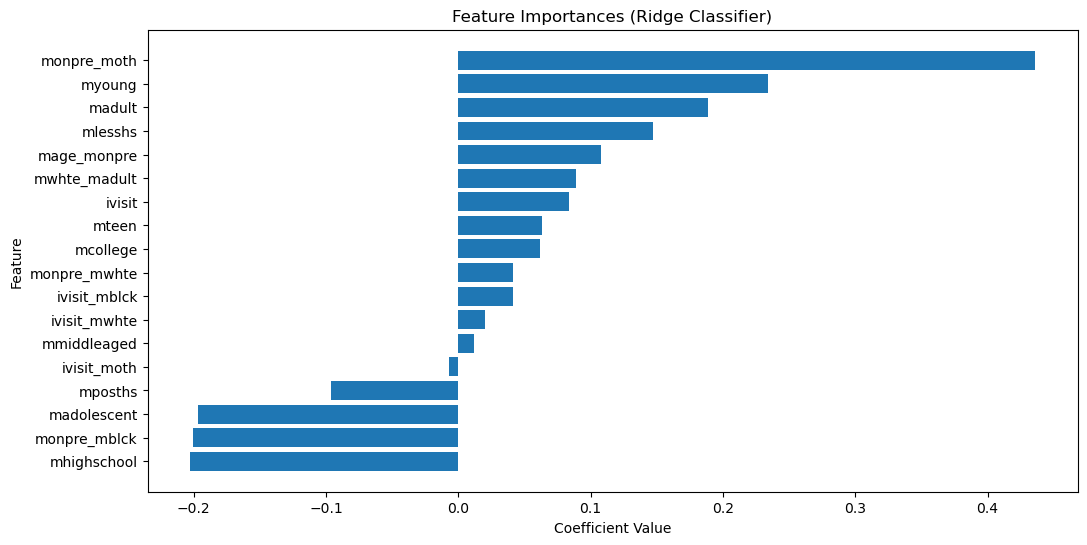

In [39]:
# Assuming model_rdg is your trained Ridge classifier
coef = model_rdg.coef_[0]
sorted_indices = np.argsort(coef)

# Positive coefficients
positive_indices = sorted_indices[coef[sorted_indices] > 0]
positive_features = x_train.columns[positive_indices]

# Negative coefficients
negative_indices = sorted_indices[coef[sorted_indices] < 0]
negative_features = x_train.columns[negative_indices]

# Concatenating positive and negative features
arranged_features = np.concatenate((positive_features, negative_features))

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(arranged_features, coef[sorted_indices])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importances (Ridge Classifier)')
plt.show()

<h4> Random Forest </h4>

In [40]:
# INSTANTIATING a Random Forest
model_rf = RandomForestClassifier( n_estimators             = 100, 
                                   ccp_alpha                = .1, 
                                   max_depth                = 7,
                                   min_samples_leaf         = 4,
                                   min_samples_split        = 5,
                                   max_leaf_nodes           = 8,
                                   bootstrap                = True,
                                   criterion                = 'entropy',
                                   warm_start               = True,
                                   class_weight             = {0: .05, 1: .95}
                                )

# fitting the model object
model_rf_fit = model_rf.fit(x_train, y_train)

# Predicting on the test data
pred_test_rf = model_rf_fit.predict(x_test)

# Getting the predicted probabilities for the positive class
probabilities_rf = model_rf.predict_proba(x_test)[:, 1]

# Define a threshold
threshold_rf = 0.5

# Applying the threshold to convert probabilities into binary predictions
pred_test_threshold_rf = (probabilities_rf >= threshold_rf).astype(int)

# Calculating and printing the f1 score 
f1_test_threshold_rf = f1_score(y_test, pred_test_threshold_rf)
print('F-1 Score:', f1_test_threshold_rf.round(decimals = 4))

# Calculating precision and recall scores
precision_test_rf  = precision_score(y_test, pred_test_threshold_rf)
recall_test_rf     = recall_score(y_test, pred_test_threshold_rf)

# unpacking the confusion matrix
rf_tuned_tn_threshold, \
rf_tuned_fp_threshold, \
rf_tuned_fn_threshold, \
rf_tuned_tp_threshold = confusion_matrix(y_true = y_test, y_pred = pred_test_threshold_rf).ravel()

# printing each result one-by-one
print(f"""
True Negatives: {rf_tuned_tn_threshold}
False Positives: {rf_tuned_fp_threshold}
False Negatives: {rf_tuned_fn_threshold}
True Positives: {rf_tuned_tp_threshold}
""")
print(f"Precision: {precision_test_rf.round(decimals = 4)}")
print(f"Recall: {recall_test_rf.round(decimals = 4)}")

F-1 Score: 0.3252

True Negatives: 0
False Positives: 83
False Negatives: 0
True Positives: 20

Precision: 0.1942
Recall: 1.0


In [41]:
# # Hyperparameter Tuning for Random Forest

# # Define the parameter grid for Random Forest
# param_grid_rf = { 
#                    'n_estimators'      : np.arange(100, 500, 100),
#                    'ccp_alpha'         : np.arange(.1, 5, .1), 
#                    'max_depth'         : np.arange(1, 5, 1),
#                    'min_samples_leaf'  : np.arange(1, 5, 1),
#                    'min_samples_split' : np.arange(2, 5, 1),
#                    'max_leaf_nodes'    : np.arange(1, 10, 1),
#                    'bootstrap'         : [True, False],
#                    'warm_start'        : [True, False],
#                    'criterion'         : ['gini', 'entropy', 'log_loss'] 
#                 }

# # INSTANTIATING the model object without hyperparameters
# rf_grid = RandomForestClassifier(random_state = 219)
        
# # GridSearchCV object
# rf_cv = RandomizedSearchCV(estimator              =  rf_grid,
#                                param_distributions = param_grid_rf,
#                                cv                  = 5,
#                                n_iter              = 1000,
#                                scoring             = make_scorer(roc_auc_score,
#                                                      needs_threshold = False),
#                             random_state           = 219)

# # FITTING to the FULL DATASET (due to cross-validation)
# rf_cv.fit(x_train, y_train)

# # printing the optimal parameters and best score for each metric
# print("Tuned Parameters  :", rf_cv.best_params_)
# print("Tuned Training AUC:", rf_cv.best_score_.round(decimals = 4))

In [42]:
# After Pruning
# INSTANTIATING a Random Forest
model_rf = RandomForestClassifier( n_estimators             = 100, 
                                   max_depth                = 2,
                                   min_samples_leaf         = 9,
                                   min_samples_split        = 9,
                                   max_leaf_nodes           = 2,
                                   bootstrap                = True,
                                   criterion                = 'entropy',
                                   warm_start               = True,
                                   class_weight             = {0: .05, 1: .95}
                                )

# fitting the model object
model_rf_fit = model_rf.fit(x_train, y_train)

# Predicting on the test data
pred_test_rf = model_rf_fit.predict(x_test)

# Getting the predicted probabilities for the positive class
probabilities_rf = model_rf.predict_proba(x_test)[:, 1]

# Define a threshold
threshold_rf = 0.5

# Applying the threshold to convert probabilities into binary predictions
pred_test_threshold_rf = (probabilities_rf >= threshold_rf).astype(int)

# Calculating and printing the f1 score 
f1_test_threshold_rf = f1_score(y_test, pred_test_threshold_rf)
print('F-1 Score:', f1_test_threshold_rf.round(decimals = 4))

# Calculating precision and recall scores
precision_test_rf  = precision_score(y_test, pred_test_threshold_rf)
recall_test_rf     = recall_score(y_test, pred_test_threshold_rf)

# unpacking the confusion matrix
rf_tuned_tn_threshold, \
rf_tuned_fp_threshold, \
rf_tuned_fn_threshold, \
rf_tuned_tp_threshold = confusion_matrix(y_true = y_test, y_pred = pred_test_threshold_rf).ravel()

# printing each result one-by-one
print(f"""
True Negatives: {rf_tuned_tn_threshold}
False Positives: {rf_tuned_fp_threshold}
False Negatives: {rf_tuned_fn_threshold}
True Positives: {rf_tuned_tp_threshold}
""")
print(f"Precision: {precision_test_rf.round(decimals = 4)}")
print(f"Recall: {recall_test_rf.round(decimals = 4)}")

F-1 Score: 0.3252

True Negatives: 0
False Positives: 83
False Negatives: 0
True Positives: 20

Precision: 0.1942
Recall: 1.0


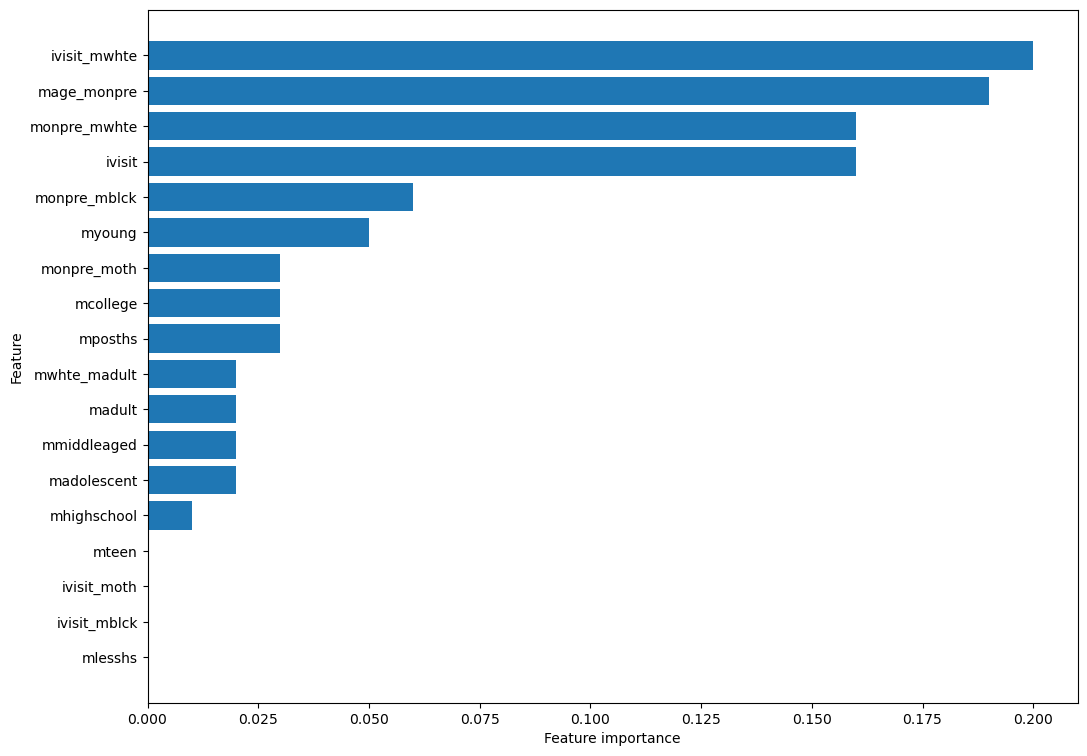

In [43]:
# plotting feature importances
plot_feature_importances(model_rf_fit,
                         train = x_train,
                         export = False)

<h4> Gradient Boost Machine </h4>

In [44]:
# INSTANTIATING a Gradient Boost
model_gbm = GradientBoostingClassifier( n_estimators      = 100, 
                                        learning_rate     = 1, 
                                        max_depth         = 7,
                                        min_samples_leaf  = 4,
                                        min_samples_split = 5,
                                        loss              = 'log_loss',
                                        criterion         = 'friedman_mse',
                                        warm_start        = False
                                       )

# fitting the model object
model_gbm.fit(x_train, y_train)

# Predicting on the test data
pred_test_gbm = model_gbm.predict(x_test)

# Getting the predicted probabilities for the positive class
probabilities_gbm = model_gbm.predict_proba(x_test)[:, 1]

# Define a threshold
threshold_gbm = 0.5

# Applying the threshold to convert probabilities into binary predictions
pred_test_threshold_gbm = (probabilities_gbm >= threshold_gbm).astype(int)

# Calculating and printing the f1 score 
f1_test_threshold_gbm = f1_score(y_test, pred_test_threshold_gbm)
print('F-1 Score:', f1_test_threshold_gbm.round(decimals = 4))

# Calculating precision and recall scores
precision_test_gbm = precision_score(y_test, pred_test_threshold_gbm)
recall_test_gbm    = recall_score(y_test, pred_test_threshold_gbm)

# unpacking the confusion matrix
gbm_tuned_tn_threshold, \
gbm_tuned_fp_threshold, \
gbm_tuned_fn_threshold, \
gbm_tuned_tp_threshold = confusion_matrix(y_true = y_test, y_pred = pred_test_threshold_gbm).ravel()

# printing each result one-by-one
print(f"""
True Negatives: {gbm_tuned_tn_threshold}
False Positives: {gbm_tuned_fp_threshold}
False Negatives: {gbm_tuned_fn_threshold}
True Positives: {gbm_tuned_tp_threshold}
""")
print(f"Precision: {precision_test_gbm.round(decimals = 4)}")
print(f"Recall: {recall_test_gbm.round(decimals = 4)}")

F-1 Score: 0.1667

True Negatives: 70
False Positives: 13
False Negatives: 17
True Positives: 3

Precision: 0.1875
Recall: 0.15


In [45]:
# # Hyperparameter Tuning for GBM

# # Define the parameter grid for GBM
# param_grid_gbm = { 'loss'              : ['log_loss', 'exponential'],
#                    'learning_rate'     : np.arange(.001, 1, .1), 
#                    'n_estimators'      : np.arange(100, 500, 100),
#                    'criterion'         : ['friedman_mse', 'squared_error'],
#                    'min_samples_split' : np.arange(2, 5, 1),
#                    'min_samples_leaf'  : np.arange(1, 5, 1),
#                    'max_depth'         : np.arange(1, 5, 1),                  
#                 }

# # INSTANTIATING the model object without hyperparameters
# gbm_grid = GradientBoostingClassifier(random_state = 219)

# # GridSearchCV object
# gbm_cv = RandomizedSearchCV(estimator              =  gbm_grid,
#                                param_distributions = param_grid_gbm,
#                                cv                  = 5,
#                                n_iter              = 5000,
#                                scoring             = make_scorer(roc_auc_score,
#                                                      needs_threshold = False))

# # FITTING to the FULL DATASET (due to cross-validation)
# gbm_cv.fit(x_train, y_train)


# # PREDICT step is not needed

# # printing the optimal parameters and best score
# print("Tuned Parameters  :", gbm_cv.best_params_)
# print("Tuned Training AUC:", gbm_cv.best_score_.round(decimals = 4))

<h4> After Pruning </h4>

In [46]:
# After tuning
# INSTANTIATING a GBM 

sample_weight = {0: 0.05, 1: 0.95}

# Convert the sample_weight dictionary into an array
sample_weights = np.array([sample_weight[y_val] for y_val in y_train])

model_gbm = GradientBoostingClassifier(learning_rate      = 0.004,
                                       n_estimators       = 100, 
                                       min_samples_split  = 2,
                                       min_samples_leaf   = 2, 
                                       max_depth          = 5,
                                       loss               = 'log_loss',
                                       criterion          = 'friedman_mse',
                                       random_state       = 219)

# fitting the model object
model_gbm_fit = model_gbm.fit(x_train, y_train, sample_weight=sample_weights)

# Predicting on the test data
pred_test_gbm = model_gbm_fit.predict(x_test)

# Define a threshold
threshold_gbm = 0.5

# Applying the threshold to convert probabilities into binary predictions
pred_test_threshold_gbm = (pred_test_gbm >= threshold_gbm).astype(int)

# Calculating and printing the f1 score 
f1_test_threshold_gbm = f1_score(y_test, pred_test_threshold_gbm)
print('F-1 Score:', f1_test_threshold_gbm.round(decimals = 4))

# Calculating precision and recall scores
precision_test_gbm = precision_score(y_test, pred_test_threshold_gbm)
recall_test_gbm    = recall_score(y_test, pred_test_threshold_gbm)

# unpacking the confusion matrix
gbm_tuned_tn_threshold, \
gbm_tuned_fp_threshold, \
gbm_tuned_fn_threshold, \
gbm_tuned_tp_threshold = confusion_matrix(y_true = y_test, y_pred = pred_test_threshold_gbm).ravel()

# printing each result one-by-one
print(f"""
True Negatives: {gbm_tuned_tn_threshold}
False Positives: {gbm_tuned_fp_threshold}
False Negatives: {gbm_tuned_fn_threshold}
True Positives: {gbm_tuned_tp_threshold}
""")
print(f"Precision: {precision_test_gbm.round(decimals = 4)}")
print(f"Recall: {recall_test_gbm.round(decimals = 4)}")

F-1 Score: 0.3252

True Negatives: 0
False Positives: 83
False Negatives: 0
True Positives: 20

Precision: 0.1942
Recall: 1.0


<b>Final Model - GBM </b><br>
The results indicate that the GBM Classification model performed the best, followed by the Random Forest Classification, and lastly, the Decision Tree. GBM was chosen as the best model because it clearly identified the factors with the highest impact on predicting low birth weight, such as the mother's age and the month prenatal care begins. Among the models, GBM showed the highest correlation coefficient with these variables compared to the other models. Gradient Boosted Decision Trees have been shown to outperform other models due to their boosting technique, which involves implementing several models and aggregating their results. The model also provides a score indicating the usefulness or value of each feature in constructing the boosted decision trees. The more an attribute is used to make key decisions within the decision trees, the higher its relative importance. Additionally, the models are built sequentially, with each subsequent model attempting to reduce the errors of the previous model.

GBM can also handle complex interactions between features and the target variable better than simpler models like Decision Trees. This means it can capture the relationships between features and the target more effectively, leading to better identification of important features.


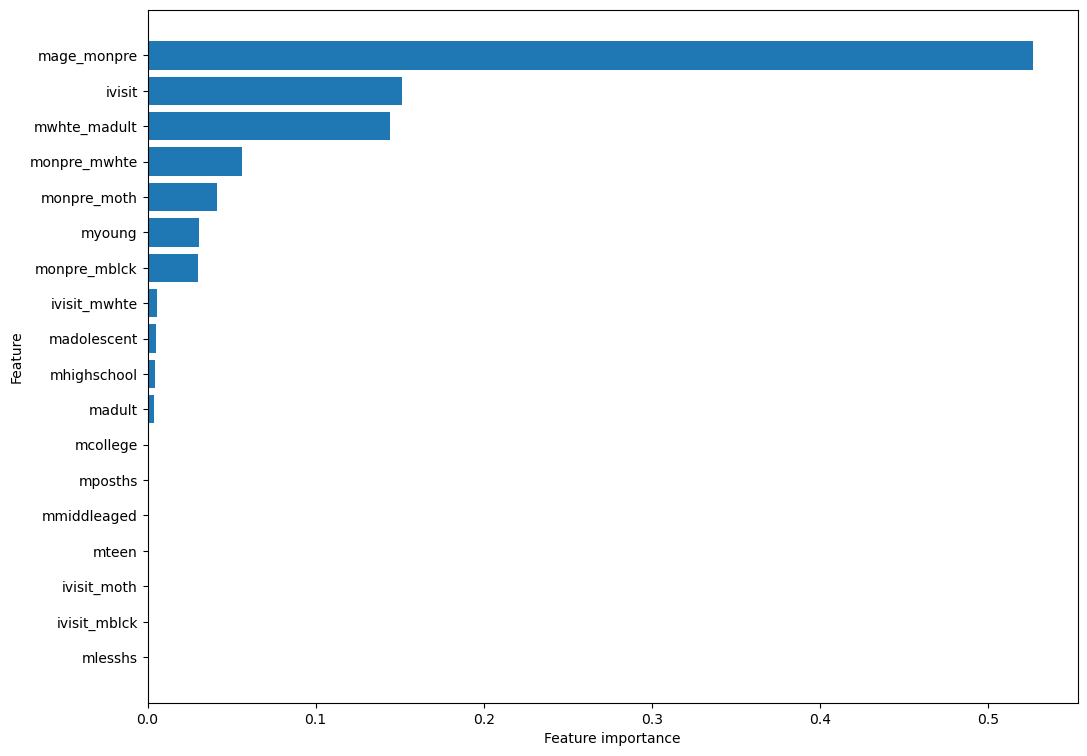

In [47]:
# plotting feature importances
plot_feature_importances(model_gbm_fit,
                         train = x_train,
                         export = False)

In [52]:
# Analyzing features

# INSTANTIATING a GBM
gbm_final = GradientBoostingClassifier(learning_rate      = 0.004,
                                       n_estimators       = 100, 
                                       min_samples_split  = 2,
                                       min_samples_leaf   = 2, 
                                       max_depth          = 5,
                                       loss               = 'log_loss',
                                       criterion          = 'friedman_mse',
                                       random_state       = 219
                                      )
# Fitting the object
gbm_final_fit = gbm_final.fit(x_train, y_train, sample_weight=sample_weights)

# For feature importance
gbm_importance = pd.DataFrame({'Feature': x_train.columns, 'Importance': gbm_final.feature_importances_})
gbm_importance = gbm_importance.sort_values(by='Importance', ascending=False)

# Filter features with positive importance coefficients
gbm_importance_positive = gbm_importance['Importance'].round(4)
gbm_importance

,Feature,Importance
14,mage_monpre,5.268855e-01
7,ivisit,1.511485e-01
13,mwhte_madult,1.444281e-01
15,monpre_mwhte,5.605745e-02
17,monpre_moth,4.129893e-02
9,myoung,3.063743e-02
16,monpre_mblck,3.011564e-02
4,ivisit_mwhte,5.866446e-03
10,madolescent,4.971872e-03
1,mhighschool,4.159118e-03


<h3> Feature Importance </h3>

<b>Top two factors with largest impact on birthweight</b>

Based on the feature importance results from the Gradient Boosting Classifier (GBM) model, the two features that had the largest impact on birth weight are:

1. <b>Mother's Age_Month of Prenatal Care Started (mage_monpre)</b><br>
This feature has the highest importance score, highlighting the importance of taking into account both the mother's age and the timing of the prenatal care. Given the importance of both mother's age and the timing of prenatal care, special attention should be given to high-risk groups, such as teenage mothers or older mothers, to ensure they receive timely and comprehensive prenatal care. This could involve tailored educational programs, early identification of risk factors, and additional support services.<br><br>

2. <b>Inadequate Prenatal Visits (ivisit)</b><br>
This feature ranks second in importance, indicating that insufficient prenatal visits or limited access to maternal care significantly contributes to low birth weight. Inadequate prenatal visits (less than 8) highlights the the importance of regular check-ups and monitoring during pregnancy. Prenatal care is most effective when started early and maintained consistently. It's crucial to ensure expecting mothers have access to adequate prenatal care. This can be achieved by raising awareness about the importance of prenatal visits, providing resources for transportation or childcare, and expanding healthcare services in underserved areas. Access to maternal care and clinical treatment should be made affordable and available to families lacking the means. Telemedicine is also another option to address disparities in prenatal care. It involves the provision of healthcare services by professionals using technology to exchange information for diagnosis, treatment, and prevention of diseases.

Every woman deserves healthcare that is safe, effective, timely, efficient, and equitable. Ensuring consistent and enough access to maternity services and treatment is crucial for mothers to maintain optimal health and reduce the risk of pregnancy complications. This information can guide decision-makers, public health professionals, clinicians, and researchers in advocating for policies and resources that improve maternity care access nationwide. 

In [ ]:
# Predicting on the training data
pred_train_gbm = model_gbm_fit.predict(x_train)

# Define a threshold for predictions
threshold_gbm = 0.5

# Applying the threshold to convert probabilities into binary predictions for training data
pred_train_threshold_gbm = (pred_train_gbm >= threshold_gbm).astype(int)

# Calculating the confusion matrix for training data
tuned_gbm_tn_train, \
tuned_gbm_fp_train, \
tuned_gbm_fn_train, \
tuned_gbm_tp_train = confusion_matrix(y_true=y_train, y_pred=pred_train_threshold_gbm).ravel()

# Calculating the confusion matrix for test data
tuned_gbm_tn_test, \
tuned_gbm_fp_test, \
tuned_gbm_fn_test, \
tuned_gbm_tp_test = confusion_matrix(y_true=y_test, y_pred=pred_test_threshold_gbm).ravel()

# printing each result one-by-one for training data
print("Confusion Matrix for Training Data:")
print(f"True Negatives : {tuned_gbm_tn_train}")
print(f"False Positives: {tuned_gbm_fp_train}")
print(f"False Negatives: {tuned_gbm_fn_train}")
print(f"True Positives : {tuned_gbm_tp_train}\n")

# printing each result one-by-one for test data
print("Confusion Matrix for Test Data:")
print(f"True Negatives : {tuned_gbm_tn_test}")
print(f"False Positives: {tuned_gbm_fp_test}")
print(f"False Negatives: {tuned_gbm_fn_test}")
print(f"True Positives : {tuned_gbm_tp_test}")


<b> Final Confusion Matrix Analysis of the Testing Data</b>

The confusion matrix above indicates the performance of gradient boost machine classification model, where the goal is to predict whether a newborn will have low birthweight (class 1) or not (class 0). It shows that there are no true negatives or false negatives, but there are 83 false positives and 20 true positives. In this analysis, false positives represent cases where the model incorrectly predicts that a newborn will have low birthweight when they actually do not. False negatives, on the other hand, represent cases where the model incorrectly predicts that a newborn will not have low birthweight when they actually do.

Given the focus on correctly predicting low birthweight, false negatives are the error being controlled for in this study. False negatives occur when the model fails to identify newborns who actually have low birthweight, potentially leading to inadequate and late interventions or support for at-risk babies and their mothers. Controlling for false negatives is more crucial in this scenario because missing cases of low birthweight can have serious health implications and may result in adverse outcomes for both the newborn and the mother. Therefore, ensuring a low false negative rate is more important than controlling for false positives in this context.

<h3> Preparing for Kaggle Submission </h3>

In [ ]:
kaggle_data = pd.read_excel(io         = './kaggle_test_data.xlsx',
                            header     = 0,
                            index_col  = 'bwt_id')

# Dropping post-event horizon features
kaggle_data = kaggle_data.drop(labels = ['omaps',
                                         'fmaps'],
                               axis   = 1) # columns

kaggle_data.head(n=1)

In [ ]:
## Impute missing values ##
## Cigs and drink

# Imputing with the zero

# cigs
fill = 0
kaggle_data['cigs'] = kaggle_data['cigs'].fillna(value = fill)

# drink
fill = 0
kaggle_data['drink'] = kaggle_data['drink'].fillna(value = fill)

## Monpre

# Imputing with median per month of pregnancy that prenatal care began
monpre_medians_k = []

for month in range(0, 9):
    median_visits_k = kaggle_data.loc[kaggle_data['monpre'] == month, 'npvis'].median()
    monpre_medians_k.append(median_visits_k)

# Individual medians
kmonpre_0 = monpre_medians_k[0]
kmonpre_1 = monpre_medians_k[1]
kmonpre_2 = monpre_medians_k[2]
kmonpre_3 = monpre_medians_k[3]
kmonpre_4 = monpre_medians_k[4]
kmonpre_5 = monpre_medians_k[5]
kmonpre_6 = monpre_medians_k[6]
kmonpre_7 = monpre_medians_k[7]
kmonpre_8 = monpre_medians_k[8]

# ensuring all missing values for npvis are taken care of

for index, value in kaggle_data.iterrows():
    
    if str(kaggle_data.loc[index, 'npvis']).lower() == 'nan' and \
        kaggle_data.loc[index, 'monpre'] == 0:
        
        kaggle_data.loc[index, 'npvis'] = kmonpre_0
        
    elif str(kaggle_data.loc[index, 'npvis']).lower() == 'nan' and \
        kaggle_data.loc[index, 'monpre'] == 1:
        
        kaggle_data.loc[index, 'npvis'] = kmonpre_1
        
    elif str(kaggle_data.loc[index, 'npvis']).lower() == 'nan' and \
        kaggle_data.loc[index, 'monpre'] == 2:
        
        kaggle_data.loc[index, 'npvis'] = kmonpre_2
        
    elif str(kaggle_data.loc[index, 'npvis']).lower() == 'nan' and \
        kaggle_data.loc[index, 'monpre'] == 3:
        
        kaggle_data.loc[index, 'npvis'] = kmonpre_3
        
    elif str(kaggle_data.loc[index, 'npvis']).lower() == 'nan' and \
        kaggle_data.loc[index, 'monpre'] == 4:
        
        kaggle_data.loc[index, 'npvis'] = kmonpre_4
        
    elif str(kaggle_data.loc[index, 'npvis']).lower() == 'nan' and \
        kaggle_data.loc[index, 'monpre'] == 5:
        
        kaggle_data.loc[index, 'npvis'] = kmonpre_5
        
    elif str(kaggle_data.loc[index, 'npvis']).lower() == 'nan' and \
        kaggle_data.loc[index, 'monpre'] == 6:
        
        kaggle_data.loc[index, 'npvis'] = kmonpre_6
        
    elif str(kaggle_data.loc[index, 'npvis']).lower() == 'nan' and \
        kaggle_data.loc[index, 'monpre'] == 7:
        
        kaggle_data.loc[index, 'npvis'] = kmonpre_7
        
    elif str(kaggle_data.loc[index, 'npvis']).lower() == 'nan' and \
        kaggle_data.loc[index, 'monpre'] == 8:
        
        kaggle_data.loc[index, 'npvis'] = kmonpre_8

## fage and meduc

# Imputing with median

# fage
fage_median_k = kaggle_data['fage'].median()

# Impute median to NaN values in 'fage' column
kaggle_data.loc[kaggle_data['fage'].isna(), 'fage'] = fage_median_k

# meduc
meduc_median_k = kaggle_data['meduc'].median()

# Impute median to NaN values in 'meduc' column
kaggle_data.loc[kaggle_data['meduc'].isna(), 'meduc'] = meduc_median_k

# feduc
feduc_median_k = kaggle_data['feduc'].median()

# Impute median to NaN values in 'meduc' column
kaggle_data.loc[kaggle_data['feduc'].isna(), 'feduc'] = feduc_median_k

# Rechecking if all null values are taken care of
print(f"Remaining missing values: {kaggle_data.loc[ :, 'foth' ].isnull().sum()}")

## Feature 1: Inadequate Prenatal visit (less than 8) ##
kaggle_data['ivisit'] = 0
kaggle_data.loc[kaggle_data['npvis'] <= 8, 'ivisit'] = 1

## Feature 2: Inadequate Prenatal visit | Mother's Race ##
kaggle_data['ivisit_mwhte'] = kaggle_data['ivisit'] * kaggle_data['mwhte']
kaggle_data['ivisit_mblck'] = kaggle_data['ivisit'] * kaggle_data['mblck']
kaggle_data['ivisit_moth'] = kaggle_data['ivisit'] * kaggle_data['moth']

## Feature 3: Mother's Age & Starting Month of Prenatal care ##
kaggle_data['mage_monpre'] = kaggle_data['mage'] * kaggle_data['monpre']

## Feature 4 ##
# Mother's Age Category
kaggle_data['mteen'] = 0
kaggle_data['madolescent'] = 0
kaggle_data['myoung'] = 0
kaggle_data['mmiddleaged'] = 0
kaggle_data['madult'] = 0

kaggle_data.loc[(kaggle_data['mage'] >= 15) & (kaggle_data['mage'] <= 19), 'mteen'] = 1
kaggle_data.loc[(kaggle_data['mage'] >= 20) & (kaggle_data['mage'] <= 24), 'madolescent'] = 1
kaggle_data.loc[(kaggle_data['mage'] >= 25) & (kaggle_data['mage'] <= 29), 'myoung'] = 1
kaggle_data.loc[(kaggle_data['mage'] >= 30) & (kaggle_data['mage'] <= 34), 'mmiddleaged'] = 1
kaggle_data.loc[kaggle_data['mage'] > 34, 'madult'] = 1

## Feature 5: Mother of White Race | Adult (>34 y/o)
kaggle_data['mwhte_madult'] = kaggle_data['mwhte'] * kaggle_data['madult']

## Feature 6: Mother's Education Level
kaggle_data['mlesshs'] = 0           # less high school
kaggle_data['mhighschool'] = 0       # high school
kaggle_data['mposths'] = 0           # post high school
kaggle_data['mcollege'] = 0          # college

kaggle_data.loc[kaggle_data['meduc'] <= 7, 'mlesshs'] = 1
kaggle_data.loc[(kaggle_data['meduc'] > 7) & (kaggle_data['meduc'] <= 12), 'mhighschool'] = 1
kaggle_data.loc[(kaggle_data['meduc'] > 12) & (kaggle_data['meduc'] <= 15), 'mposths'] = 1
kaggle_data.loc[kaggle_data['meduc'] > 15, 'mcollege'] = 1

## Feature 7 : Month of Prenatal Care Began | Race
kaggle_data['monpre_mwhte'] = kaggle_data['monpre'] * kaggle_data['mwhte']
kaggle_data['monpre_mblck'] = kaggle_data['monpre'] * kaggle_data['mblck']
kaggle_data['monpre_moth'] = kaggle_data['monpre'] * kaggle_data['moth']



In [ ]:
## Transformations and Standardizations ##
# yeo-johnson transformation
kaggle_data_original = kaggle_data.copy()

# List of numerical features to transform
x_skewed = ['mage', 'meduc', 'monpre', 'npvis', 'fage', 
            'feduc', 'cigs', 'drink']

# Initialize the PowerTransformer with the Yeo-Johnson method
transformer = PowerTransformer(method='yeo-johnson')

# Transform the numerical features using the already fitted transformer
kaggle_data[x_skewed] = transformer.fit_transform(kaggle_data[x_skewed])

# List of non-binary columns to standardize
non_binary_columns = ['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 
                      'cigs', 'drink']

# Standardize the non-binary data using the already fitted scaler
kaggle_data[non_binary_columns] = scaler.transform(kaggle_data[non_binary_columns])

new_continuous_columns = ['mage_monpre', 'monpre_mwhte', 'monpre_mblck', 'monpre_moth']

# Initialize the PowerTransformer with the Yeo-Johnson method
transformer = PowerTransformer(method='yeo-johnson')

# Fit the transformer to the numerical features and transform them
kaggle_data[new_continuous_columns] = transformer.fit_transform(kaggle_data[new_continuous_columns])

# Instantiating a new StandardScaler object for the new continuous features
new_scaler_c = StandardScaler()

# Fitting the new scaler with the new continuous data
new_scaler_c.fit(kaggle_data[new_continuous_columns])

# Transforming the new continuous features
kaggle_data[new_continuous_columns] = new_scaler_c.transform(kaggle_data[new_continuous_columns])

# New binary features
new_binary_columns = ['ivisit', 'ivisit_mwhte', 'ivisit_mblck', 'ivisit_moth',
                      'mteen', 'myoung', 'madolescent', 'mmiddleaged', 'madult', 
                      'mwhte_madult', 'mlesshs', 'mhighschool', 'mposths', 'mcollege',
                      'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth']

# Instantiating a new StandardScaler object for the new continuous features
new_scaler = StandardScaler()

# Fitting the new scaler with the new continuous data
new_scaler.fit(kaggle_data[new_binary_columns])

# Transforming the new continuous features
kaggle_data[new_binary_columns] = new_scaler.transform(kaggle_data[new_binary_columns])


# Prepare x_data_kaggle
x_data_kaggle_selected = kaggle_data[sel_features]

<h3> Predicting for Kaggle Submission </h3>

In [ ]:
# Using GBM Model to predict test data
gbm_final = GradientBoostingClassifier(learning_rate      = 0.004,
                                       n_estimators       = 100, 
                                       min_samples_split  = 2,
                                       min_samples_leaf   = 2, 
                                       max_depth          = 5,
                                       loss               = 'log_loss',
                                       criterion          = 'friedman_mse',
                                       random_state       = 219
                                      )
# Fitting
gbm_final_fit = gbm_final.fit(x_train, y_train, sample_weight=sample_weights)

# Make predictions using the best model to introduce more bias 
predictions_final = gbm_final_fit.predict_proba(x_data_kaggle_selected)
predictions_final = np.where(predictions_final[:,1] > threshold_gbm, 1, 0)

## Kaggle Submission File ##

# organizing predictions
model_predictions = {"low_bwght" : predictions_final}


# converting predictions into df
model_pred_df = pd.DataFrame(data  = model_predictions,
                             index = kaggle_data.index)

# name your model
model_pred_df.to_csv(path_or_buf = "./model_output/final_model_gbm.csv",
                     index       = True,
                     index_label = 'bwt_id')

<h3> References </h3>

Abramwowicz, P. et.al (February, 2022). Inequalities in Birth Weight in Relation to Maternal Factors: A Population-Based Study of 3,813,757 Live Births. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8835086/

Arayeshgari M, Najafi-Ghobadi S, Tarhsaz H, Parami S, Tapak L. Machine Learning-based Classifiers for the Prediction of Low Birth Weight. Healthc Inform Res. 2023 Jan;29(1):54-63. doi: 10.4258/hir.2023.29.1.54. Epub 2023 Jan 31. PMID: 36792101; PMCID: PMC9932310.

Feresu, S. A., Harlow, S. D., & Woelk, G. B. (2015). Risk factors for low birthweight in Zimbabwean women: A secondary data analysis. PLOS ONE, 10(6), e0129705. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4199306/

GeeksforGeeks (March 2024). Handling Imbalanced Data. https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/

International Journal of Gynecology and Obstetrics. (February, 2023). Association of maternal age 35 years and over and prenatal care utilization, preterm birth, and low birth weight, Mexico 2008–2019. https://doi.org/10.1002/ijgo.14707

Johnny. (February, 2020). Cost-Sensitive Decision Trees for Imbalanced Classification. https://johdev.com/jupyter/2020/02/26/Decision_Tree_Imbalance.html#Decision-Trees-for-Imbalanced-Classification

Laopaiboon, M., Lumbiganon, P., Rattanakanokchai, S. et al. An outcome-based definition of low birthweight for births in low- and middle-income countries: a secondary analysis of the WHO global survey on maternal and perinatal health. BMC Pediatr 19, 166 (2019). https://doi.org/10.1186/s12887-019-1546-z

March of Dimes (2022). Prenatal Care. https://www.marchofdimes.org/peristats/data?reg=99&top=5&stop=35&lev=1&slev=4&obj=1&sreg=38

Medium (March, 2023). Handling Class Imbalance in Machine Learning. https://medium.com/@okanyenigun/handling-class-imbalance-in-machine-learning-cb1473e825ce

Ren Y, Wu D, Tong Y, López-DeFede A, Gareau S. Issue of Data Imbalance on Low Birthweight Baby Outcomes Prediction and Associated Risk Factors Identification: Establishment of Benchmarking Key Machine Learning Models With Data Rebalancing Strategies. J Med Internet Res. 2023 May 31;25:e44081. doi: 10.2196/44081. PMID: 37256674; PMCID: PMC10267797.

World Health Organization (WHO). Low birth weight. https://www.who.int/data/nutrition/nlis/info/low-birth-weight